In [857]:
### - Loading Dependencies
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm                     #Used to set colour gradient on 3D harmonics plot

from scipy.linalg import eig                  # Used to solve for eigenvalue and eigenvectors (Compared various routines)
from scipy.linalg import eigh_tridiagonal     # Used to solve for eigenvalue and eigenvectors (Compared various routines)

from scipy import interpolate                 # Used to interpolate 1D results into function used for 2D plot
from scipy.signal import argrelmax            # Used to find radial local maximas from 1D plot for 3D shells plot
from scipy.special import sph_harm            # Used to generate spherical harmonics in the 3D harmonics plot

In [858]:
### - Helper Functions

#Plotting Function - Just to tidy up the repeated use of plotting and allows for ease of use of symetric function and creating quick subplots    
def SimplePlotAssist(xvals, yvals, title='title', xlabel='xlabel (Units)', ylabel='ylabel (Units)', colour='b', ax_mode=0, symetrical=0):
    """
    Inputs: x, y, title, xlabel, ylabel, colour, ax_mode (selecting '0' uses 'plt.', '1' uses 'ax.'), 
            symetrical (setting to 1 will symetrise y limits around y=0) 
    
    Returns: matplotlib plot not yet printed. Can be imidietly printed after function call with 
             plt.show() or can be put into subplots by calling plt.subplot(rows,columns,index) 
             before function call.
    """    
    if ax_mode == 0:
        plt.plot(xvals,yvals)          #Plots Xn against Yn
        plt.title(title)               #Gives the individual subplot a title
        plt.xlabel(xlabel)             #X axis label for this subplot
        plt.ylabel(ylabel)             #Y axis label for this subplot

    else:
        ax.plot(xvals,yvals, c=colour)                     #Plots Xn against Yn
        ax.set_title(title)                                #Gives the individual subplot a title
        ax.set_xlabel(xlabel)                              #X axis label for this subplot        
        ax.set_ylabel(ylabel)                              #Y axis label for this subplot
        if symetrical == 1:                                #Checks if user requested the symetrical argument 
            y_max = np.abs(ax.get_ylim()).max()            #Finds maximum absoloute amplitude
            ax.set_ylim(ymin= -y_max, ymax= y_max)         #Sets y limits to max abs amplitude and its negative, centring plot on 0     


# Problem Overview

In this problem we will find eigenvalues of the 1D Schrödinger equation using numerical methods.

The time-independent Schrödinger equation in 1D can be written :

\begin{equation}
H \psi = E \psi \label{eq1}\tag{1}
\end{equation}

Where the Hamiltonian $H$ is given by 

$$
H = \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V \tag{2}
$$

In order to find numerical solutions, we can divide the spatial dimension into $N$ discrete points, $x_i$, and evaluate $\psi$ at each one.  Given this, equation \ref{eq1} becomes a matrix equation, with $\psi$ an $N$-dimensional vector, and $H$ an $(N \times N)$ matrix.  We can then find the eigenvalues and eigenfunctions of the equation using numerical methods.

In order to define the matrix $H$, we can use a discrete approximation of the 2nd derivative :
$$
\frac{d^2}{dx^2} \psi(x_i) \rightarrow \frac{\psi_{i-1} - 2\psi_i + \psi_{i+1}}{(\Delta x)^2}
$$

where $(\Delta x)$ is the distance between discrete points $x_i$. We will choose dimensionless units for each problem, where $x$ is measured in terms of a length $a$, and $E$ is therefore measured in units of $\frac{\hbar^2}{2m a^2}$.  We can therefore write the kinetic energy term of the Hamiltonian as a "tri-diagonal" matrix $D$, which has the leading diagonal :

$$D_{i,i} = \frac{2}{(\Delta x)^2}$$

and the diagonals above and below this are :

$$D_{i,i+1} = D_{i,i-1} = \frac{-1}{(\Delta x)^2}$$

The potential term $V \psi$ can be represented by a matrix where the leading diagonal is the potential evaluated at the $i$-th point in space, $V_{i,i} = V(x_i)$, and all other entries are zero.

Given a potential, we construct the Hamiltonian matrix, $H=D+V$, and then use a numerical method to find the eigenvalues and eigenvectors of $H$.

## Part 1

The quantum harmonic oscillator is a good example to start with, since it has exact analytic solutions. The potential is :
$$V(x) = \frac{1}{2}m \omega^2 x^2$$

If we choose to measure $x$ in units of $\sqrt{\frac{\hbar}{m \omega}}$, then $E$ will be measured in units of $\frac{1}{2}\hbar \omega$, and the potential can be written :

$$V(x_i) = i^2 (\Delta x)^2 = x_i^2$$

You should write a function which takes as argument a discrete set of space points, $x_i$, (ie. an array), and returns the potential at each point, $V_i$ (another array).

In [859]:
### - X Data Generator

#User Settings
N = 10              #(N = 10 makes it easy to verify the results by hand in this early stage)
x_min = -5
x_max = 5

#Creating spatial range generator as a function for repeated use throughout program
def generate_x(x_min, x_max, N):
    delta_x = (x_max - x_min)/N
    x = np.arange(x_min, x_max + delta_x, delta_x) #arguments(min,max,step_size) max is given as x_max + delta_x as it is non inclusive of maximum, adding one more increment of delta_x fixes this and auto scales with user choice of N
    return(x, delta_x, N)

#Generate array of N+1 discrete x values ranging from x_min to x_max  
x, delta_x, N = generate_x(x_min=x_min, x_max=x_max, N=N)


In [860]:
### - Potential Energy Function for Quantum Harmonic Oscillator
def potential_qho(x):
    """
    Input: x: Discrete spatial x values as N x 1 array.
    
    Returns: v: N x 1 array with the corresponsing potential energy of the QHO at each x value.
    """
    v = x**2       #Quantum Harmonic Oscillator Potential Energy
    return v


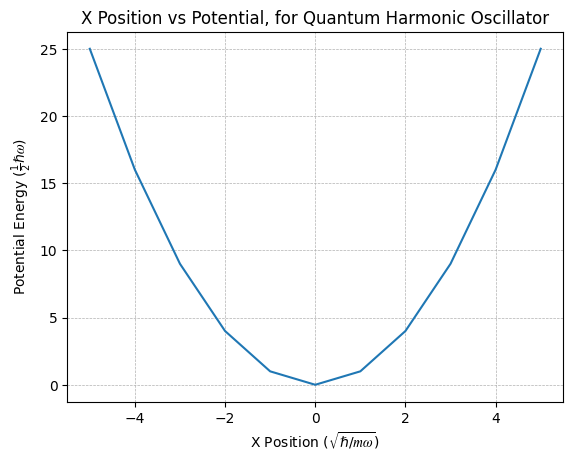

In [861]:
### - Plotting Potential for Quantum Harmonic Oscillator

#Calculate Potential using function
V_qho = potential_qho(x)                                               #Runs QHO potential function defined above

#Plot Setup
title = "X Position vs Potential, for Quantum Harmonic Oscillator" 
xlabel = "X Position $(\sqrt{ℏ/𝑚𝜔})$"                                  #Text encapsulated within two $ signs is rendered as latex, needed it to use non standard charecters i.e hbar, psi, etc 
ylabel = "Potential Energy $(\\frac{1}{2}ℏ𝜔)$" 

#Plotting
plt.plot(x, V_qho)          #Plots Xn against Yn
plt.title(title)               #Gives the individual subplot a title
plt.xlabel(xlabel)             #X axis label for this subplot
plt.ylabel(ylabel)             #Y axis label for this subplot
plt.grid(linestyle = '--', linewidth = 0.5)                            #Adds grid to the plot to make it easier to read off values visualy
plt.show()

Explain tthe above


# Part 2

The following function, given the discrete space points $x_i$ and the potential $V_i$, constructs and returns the Hamiltonian matrix.

In [862]:
###Hamiltonian tridiag Function                      #This is a different hamiltonian function, further on in the code i compared differnt scipy solvers, this function creates the hamiltonian in the format expectd by eigh.tridiagonal solver to calculate eigenvalaues and eigenvectors, this fucntion creates the hamiltonian leading and ofset diagnonals only not the entire matrix 
def hamiltonian_diag(x, V, delta_x):
    """
    Input: x: Discrete x values as N x 1 array, 
           V: Potential Energy values as N x 1 array, 
           delta_x: The step size (dx) as a single float
    
    Returns: H_main: Hamiltonian leading diagonal as 1D array, 
             H_plusone: Hamiltonian ofset diagonal as 1D array.
    """
    #The kinetic energy term of the Hamiltonian  
    D_main = np.full(len(x), fill_value = 2/(delta_x**2))           #Creates a 1D array of same length of x where each value is 2/(delta_x**2
    D_plusone = np.full(len(x) - 1 , fill_value = -1/(delta_x**2))    #Creates a 1D array of same length of x-1 (Ofset diagonals length is 1 less than on the leading diagonal), where each vlue is -1/(delta_x**2)

    #The Hamiltonian matrix, 𝐻=𝐷+𝑉                                #V is not calculated in function as it is passed n as argument already in the correct 1D format
    H_main = D_main + V                                           #Creates the 1D hamiltonain leading diagonal by combining the Kinetic and Potential energy arrays leading diagonals values
    H_plusone = D_plusone                                         #Creates the 1D hamiltonain ofset diagonal by combining th Kinetic and Potential energy arrays ofset diagonals values (Potential energy ofset diagonalas are all 0 so just the Kinetic energy term is used)
    
    return(H_main, H_plusone)                                     #Returns the Hamiltonian 1D leading diagonal and the Hamiltonian 1D offset diagonal

In [863]:
### - Hamiltonian diagonals from hamiltonian_diag function for the scipy tridiagonal solver
H_main, H_plusone = hamiltonian_diag(x, V_qho, delta_x)
print("Hamiltonian Main Diagonal:", H_main)
print("Hamiltonian +-1 Diagonal:", H_plusone)

Hamiltonian Main Diagonal: [27. 18. 11.  6.  3.  2.  3.  6. 11. 18. 27.]
Hamiltonian +-1 Diagonal: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


# Part 3

Now we will find the first 10 eigenvalues of the quantum harmonic oscillator Hamiltonian using an appropriate scipy routine. It is important to use a large number of $x$ points, at least 1000, covering sufficient range that the wavefunction falls to zero at the extremities. 

###  analytical solution 

The energy levels of the quantum harmonic oscillator can be calculated using the Schrödinger equation for a one-dimensional harmonic oscillator potential. The Hamiltonian operator for a one-dimensional harmonic oscillator is given by:

$$\hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + \frac{1}{2}m\omega^2x^2$$

Where:
- $\hat{H}$ is the Hamiltonian operator.
- $\hbar$ is the reduced Planck constant.
- $m$ is the mass of the oscillator.
- $\omega$ is the angular frequency of the oscillator.
- $x$ is the position variable.

The Schrödinger equation for the harmonic oscillator is:

$\hat{H}\psi(x) = E\psi(x)$

Where:
- $\psi(x)$ is the wavefunction.
- $E$ is the energy eigenvalue.

Solving this differential equation leads to Hermite polynomials, and the energy eigenvalues are given by:

$$E_n = \left( n + \frac{1}{2} \right) \hbar \omega$$

Where:
- $n$ is a non-negative integer representing the quantum number of the energy level.

This equation represents the quantization of energy levels in the quantum harmonic oscillator. Each energy level is equally spaced, with a separation of $\hbar \omega$ between adjacent levels so the energy eigenvalues are simply $n + \frac{1}{2}$.

Given we are expressing energy in terms of $\frac{1}{2} \hbar \omega$, the energy levels simplify to odd integers given by $2n + 1$.

<div align="center">

| n   | Analytical Result         | in terms of $\frac{1}{2}ℏ𝜔$ |
|-----|----------------|-------------------|
| 0   | $\frac{1}{2}ℏ𝜔$  | 1                 |
| 1   | $1\frac{1}{2}ℏ𝜔$ | 3                 |
| 2   | $2\frac{1}{2}ℏ𝜔$ | 5                 |
| 3   | $3\frac{1}{2}ℏ𝜔$ | 7                 |
| 4   | $4\frac{1}{2}ℏ𝜔$ | 9                 |
| 5   | $5\frac{1}{2}ℏ𝜔$ | 11                |
| 6   | $6\frac{1}{2}ℏ𝜔$ | 13                |
| ... | ...            | ...               |

</div>

In [864]:
### - Analytical Quantum Harmonic Oscillator Eigenvalues
def qho_analytical_e_vals(maxE_val):
    """
    Input: maxE_val: maximum desired eigenvalue
    
    Returns: analytical_E_vals: 1D list of analytical eigenvales for the QHO from ground state up till maxE_val
             n_vals: 1D list of index positions for the analytical eigenvales
    """    
    n_vals= np.arange(0,maxE_val,1)                #Initialises list to hold the index values for the analytical eignevalues
    analytical_E_vals = 2 * n_vals + 1             #Calculates the analytical eigenvalues, which are given by (n*2)+1 due to the choice of units we have used for energy (1/2)*ℏ𝜔

    return(analytical_E_vals, n_vals)              #Returns the list of eigenvalues and the list of index values

We will compare the computed eigenvalues with the expected eigenvalues.

In [865]:
### - Testing solvers vs QHO analytical soloution to quantify error 
def compare_solvers_to_analytical(N, maxE_val, potential_function=potential_qho, analytical_function=qho_analytical_e_vals, sorting_fix=0):
    """
    Input: N: 
        Int value for number of points to divide the spatial range into, 
        maxE_val: maximum desired eigenvalue, 
        potential_function: pass in function for potential energy (allows this to be used for both QHO and Hydrogen)
        analytical_function: pass in function for analytical eigenvalues (allows this to be used for both QHO and Hydrogen)
        sorting_fix: pass in 0 [off] or 1 [on] if set to 1 the output of the scipy eig solver is sorted before being returned (as it retunrs values in random ordering as you shall see further in the program)

    Returns:
        E_vals_tridiag: 1D array of eigenvalues from the tridiagonal solver
        E_vectors_tridiag: 2D array of eigenvectors from the tridiagonal solver
        tridiag_error_vals: 1D array of the absolute error between the analytical and tridiagonal solver eigenvalues
        x: 1D array of spatial x values
        V: 1D array of potential energy values
    """      
    if potential_function == potential_qho:
        #Generate array of N+1 discrete x values ranging from -5 to 5
        x, delta_x, N = generate_x(x_min=-5, x_max=5, N=N)
        
    elif potential_function == potential_hydrogen:
        #Generate array of N+1 discrete r values ranging from 0 to 300
        x, delta_x, N = generate_x(x_min=0, x_max=300, N=N)    #these are actually r, and delta_r but keeping the name the same saves double coding all the rest of this function 

    #Calculates potential
    V = potential_function(x)
    
    #Calculates the hamiltonian
    H_main, H_plusone = hamiltonian_diag(x, V, delta_x)

    ###Eigenvalue & Eigenvector Solvers
    E_vals_tridiag, E_vectors_tridiag = eigh_tridiagonal(H_main, H_plusone)        #scipy.linalg.eigh_tridiagonal
    
    #Calcualates analytical eigenvalues
    analytical_E_vals, n_vals = analytical_function(maxE_val)
    
    #Calculating error of simulation relative to the analytical result
    tridiag_error_vals = abs(analytical_E_vals - E_vals_tridiag[0:maxE_val].real)

    #Protection for upcoming plotting from user having set 'n' value greater than 'N' (n = number of eigenvalues to plot, N = number of points in x range)
    if maxE_val > N:
        raise ValueError('User selected value for n (n = %s)' %maxE_val, 'must be equal to or less than N (N = %s)' %N)

    ### - Plotting
    plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)
    
    #plotting analytical results vs n compared to my results vs n
    plt.subplot(1,2,1)
    plt.title("Comparison of Scipy solvers to analytical result with N=%s" %N)
    plt.xlabel("Eigenvalue number (n)")
    plt.ylabel("Energy (UNITS)")
    plt.scatter(n_vals,analytical_E_vals, c='r', label='Analytical',)
    plt.plot(n_vals,E_vals_tridiag[0:maxE_val].real, c='g', label='Simulated')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()

    #Plotting error vs n
    plt.subplot(1,2,2)
    plt.title("Error in scipy solvers reletive to analytical result with N=%s" %N)
    plt.xlabel("Eigenvalue number (n)")
    plt.ylabel("Abs Error")
    plt.plot(n_vals,tridiag_error_vals, c='g', label='Simulated')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.show()
    
    return (E_vals_tridiag, E_vectors_tridiag, tridiag_error_vals, x, V)


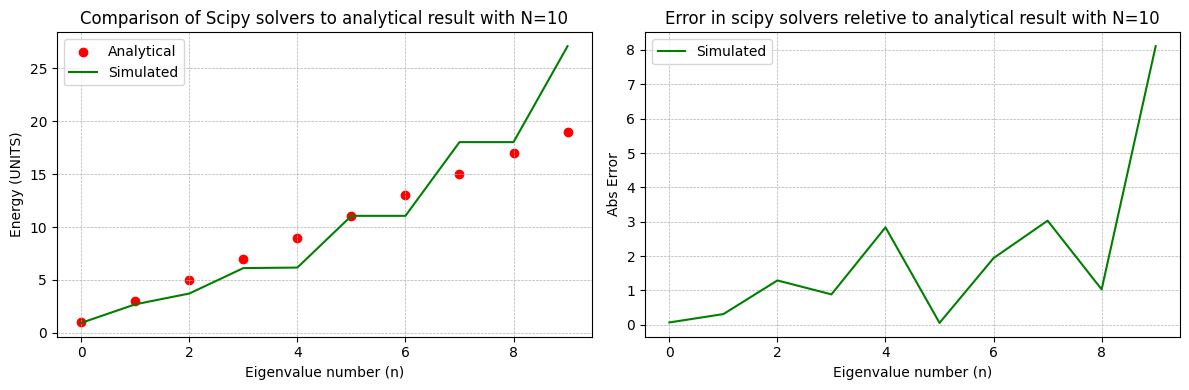

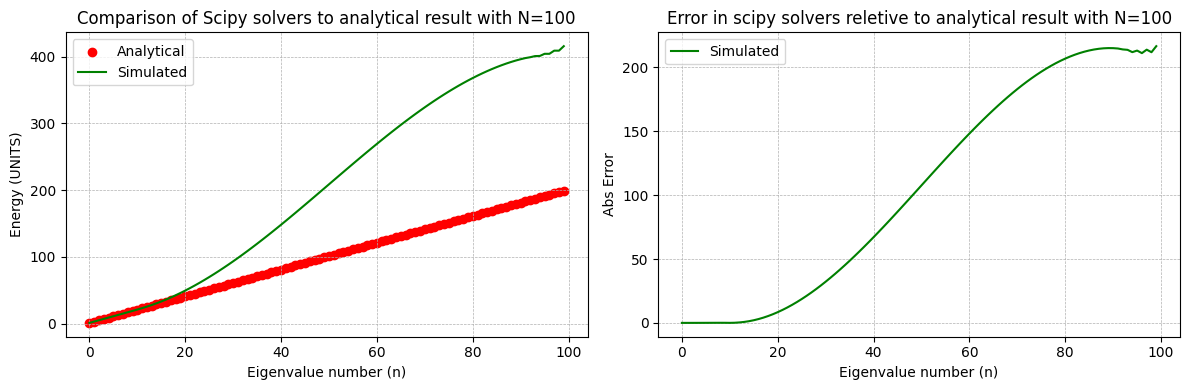

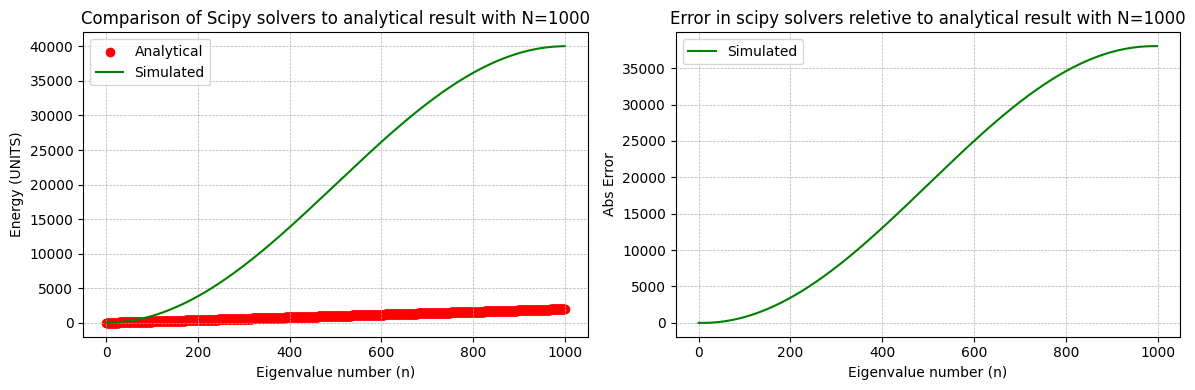

In [866]:
### - Plotting comparison between analytical result and Scipys eig and eigh.tridiag solvers across a range of N values (the number of points to discretise the spatial range into) 
compare_solvers_to_analytical(N=10, maxE_val=10)        #N=10
compare_solvers_to_analytical(N=100, maxE_val=100)      #N=100
compare_solvers_to_analytical(N=1000, maxE_val=1000);   #N=1000, the semicolon at end of line stops jupiter notebook printing the return of the final function call as i have not set it to a variable

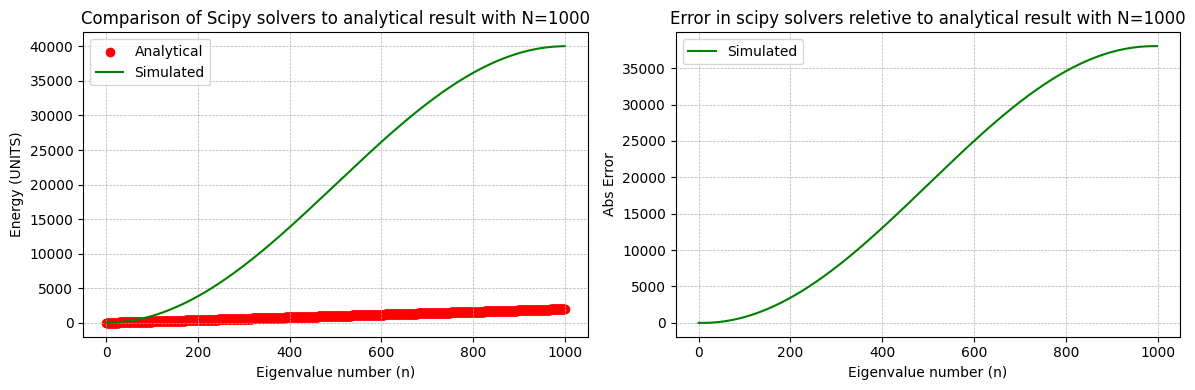

In [867]:
E_vals_tridiag, E_vectors_tridiag, tridiag_error_vals, x, V_qho = compare_solvers_to_analytical(N=1000, maxE_val=1000, sorting_fix=1);    #Same as the above but now with the sorting fix applied for the eig solver

Both solvers now match but from the plots we can see that they diverge from the expected analytical result very strongly as the eigenvalue number 'n' gets large


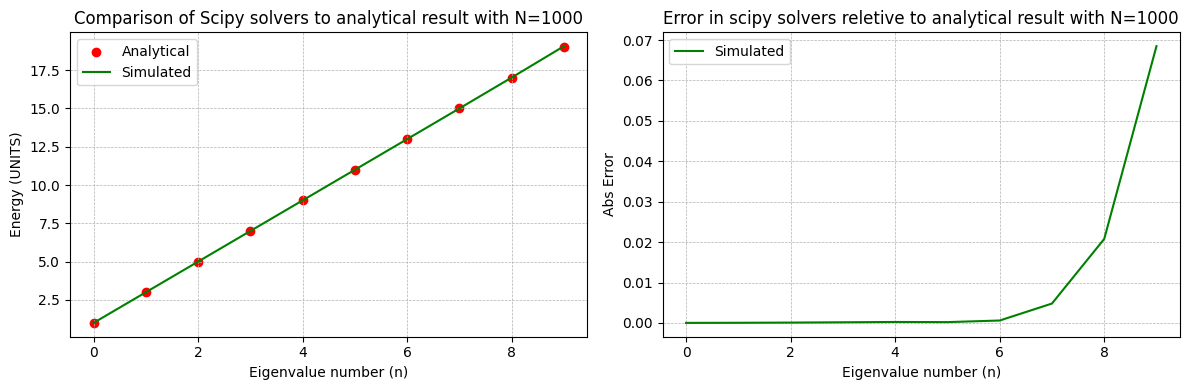

In [868]:
compare_solvers_to_analytical(N=1000, maxE_val=10, sorting_fix=1);     #Same as above with N remaining at 1000, have just plotted a zoomed in portion fo the plot only up to the 30th eigenvalue, to see how the numerical results compare to the analytical at low values of E_n

### Not sure of cause of this if it is juts a coincidence or theere is some deeper reason or there is a bug in the code


#  when using N of 40 the fucntion is not entirely stable however the distortions actually keep the eigenvalues closer to the expected results for longer than using a higher and more stable value of N


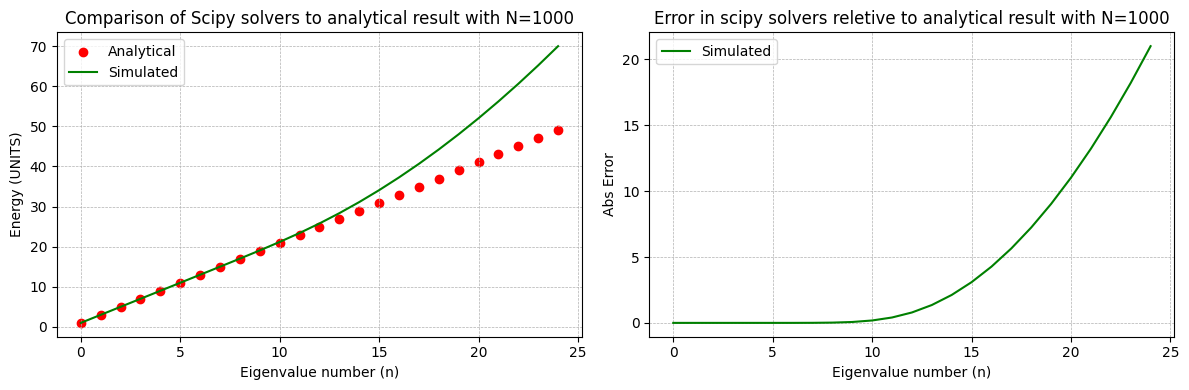

In [900]:
compare_solvers_to_analytical(N=1000, maxE_val=25, sorting_fix=1);     #Same as above with N remaining at 1000, have just plotted a zoomed in portion fo the plot only up to the 30th eigenvalue, to see how the numerical results compare to the analytical at low values of E_n

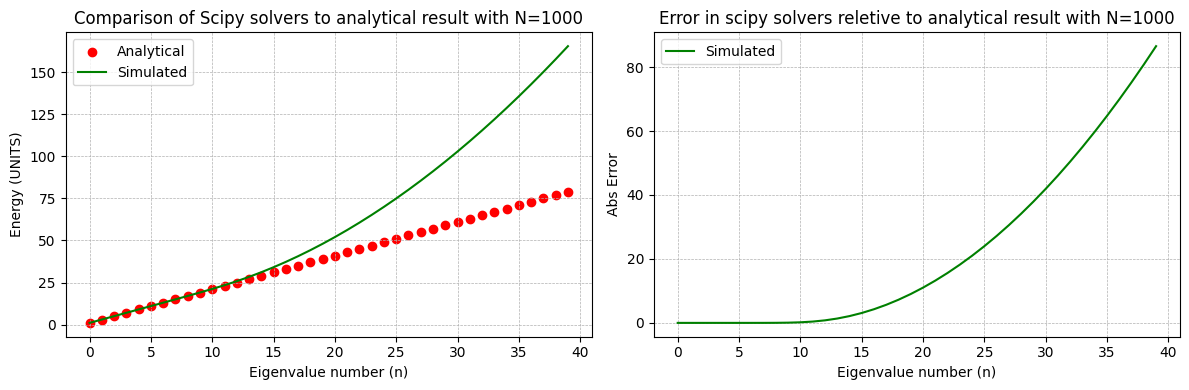

In [869]:
compare_solvers_to_analytical(N=1000, maxE_val=40, sorting_fix=1);     #Same as above with N remaining at 1000, have just plotted a zoomed in portion fo the plot only up to the 30th eigenvalue, to see how the numerical results compare to the analytical at low values of E_n

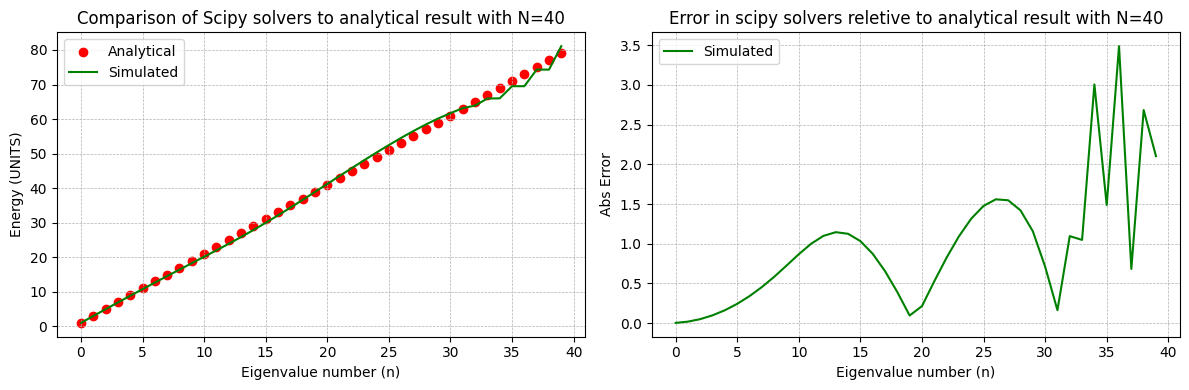

In [870]:
compare_solvers_to_analytical(N=40, maxE_val=40, sorting_fix=1);     #Same as above with N remaining at 1000, have just plotted a zoomed in portion fo the plot only up to the 30th eigenvalue, to see how the numerical results compare to the analytical at low values of E_n

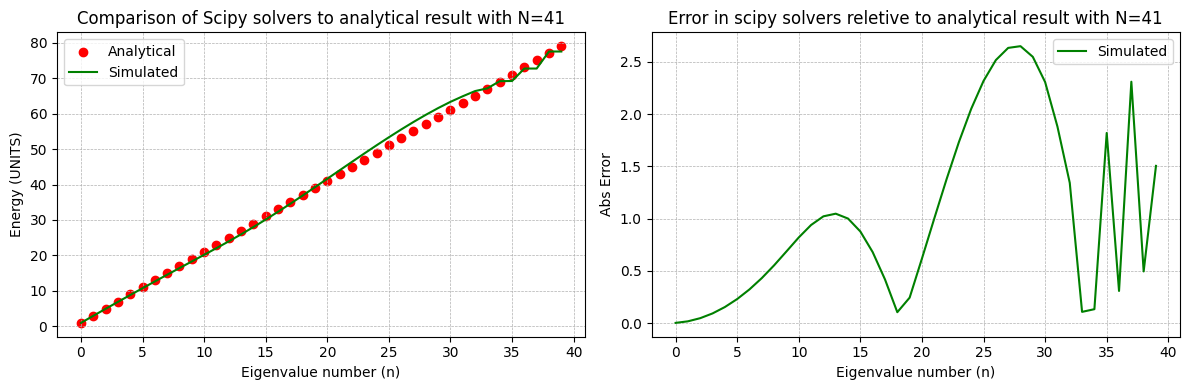

In [871]:
compare_solvers_to_analytical(N=41, maxE_val=40, sorting_fix=1);     #Same as above with N remaining at 1000, have just plotted a zoomed in portion fo the plot only up to the 30th eigenvalue, to see how the numerical results compare to the analytical at low values of E_n

As we will be keeping to a reletivly low number of n (approx 10) the error remains small

In [872]:
### - QHO Analytical Eigenvectors Function
def qho_analytical_e_vectors(x, n):
    """
    Input: x: range of x to calculate eigenvector over
           n: energy eigenvalue index of eigenvector to return
    
    Returns: wavefunc: The eigenvector of energy E_n over the range x
             prob_density: The probability density (wavefunction**2) over range x 
    """

    term_n = [((1/(np.sqrt(np.pi)))**(1/2)) * np.exp(-(x**2)/(2)),                                  #Analytical Eigenvector 1
              ((2/(np.sqrt(np.pi)))**(1/2)) * (x) * np.exp(-(x**2)/(2)),                            #Analytical Eigenvector 2
              ((2/(np.sqrt(np.pi)))**(1/2)) * ((x**2)-(1/2)) * np.exp(-(x**2)/(2)),                 #Analytical Eigenvector 3
              (2 * ((1/(3 * np.sqrt(np.pi)))**(1/2)) * (x) * ((x**2)-(3/2)) * np.exp(-(x**2)/(2)))] #Analytical Eigenvector 4       
    
    wavefunc = term_n[n]                #Selects the analytical eigenvector from above list corresponding to the input value n
    prob_density = wavefunc**2          #Squares the wavefunction to arrive at the probability density
    return (wavefunc, prob_density)     #Returns the wavefunction and probability density 


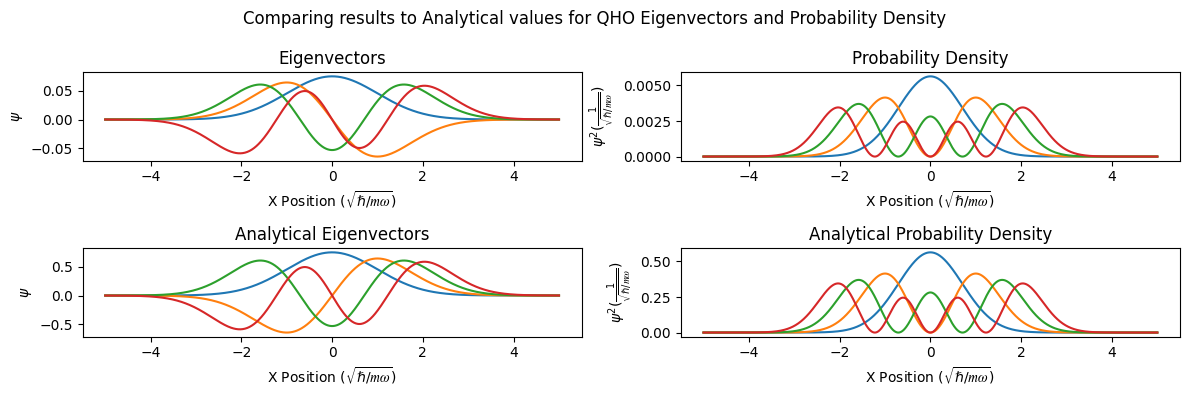

In [873]:
### - Plotting Comparison of QHO !Eigenvectors! results to Analytical Soloutions
xlabel1 = 'X Position $(\sqrt{ℏ/𝑚𝜔})$'  
ylabel1 = '$\psi$'
ylabel2 = '$\psi^2 (\\frac{1}{\sqrt{ℏ/𝑚𝜔}})$'
title1 = 'Eigenvectors'
title2 = "Probability Density"

plt.subplots(figsize=(12, 4), tight_layout=True)
plt.suptitle("Comparing results to Analytical values for QHO Eigenvectors and Probability Density")

plt.subplot(2,2,1)            #Numerical Eigenvectors
for n_indx in range (0,4):
    SimplePlotAssist(x, E_vectors_tridiag[:,n_indx], title=title1, xlabel=xlabel1, ylabel=ylabel1)

plt.subplot(2,2,2)            #Numerical Probability Density
for n_indx in range (0,4):
    SimplePlotAssist(x, E_vectors_tridiag[:,n_indx]**2, title=title2, xlabel=xlabel1, ylabel=ylabel2)

plt.subplot(2,2,3)            #Analytical Eigenvectors
for n_indx in range (0,4):
    analytical_wavefunc = qho_analytical_e_vectors(x, n_indx)[0]
    SimplePlotAssist(x, analytical_wavefunc, title="Analytical " + title1, xlabel=xlabel1, ylabel=ylabel1)
    
plt.subplot(2,2,4)            #Analytical Probability Density
for n_indx in range (0,4):
    analytical_probability = qho_analytical_e_vectors(x, n_indx)[1]
    SimplePlotAssist(x, analytical_probability, title="Analytical " + title2, xlabel=xlabel1, ylabel=ylabel2)
    
plt.show()    

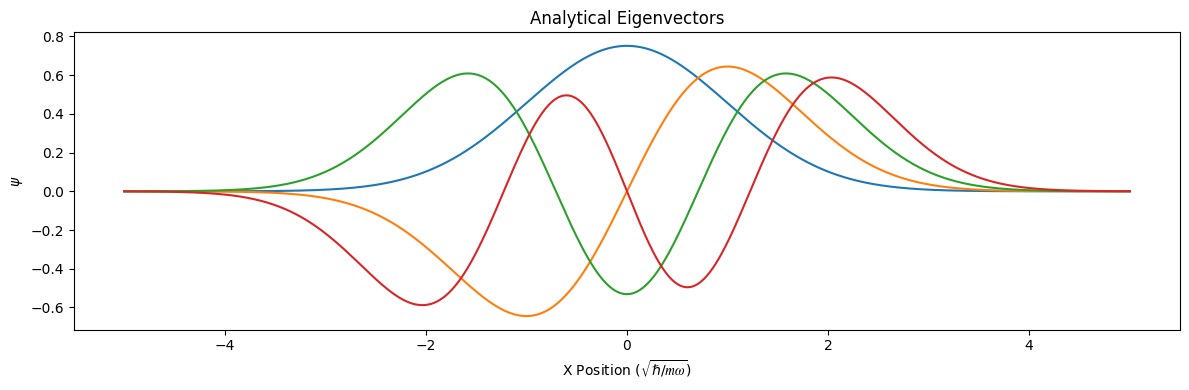

In [874]:
plt.subplots(figsize=(12, 4), tight_layout=True)

plt.subplot(1,1,1)            #Numerical Eigenvectors
for n_indx in range (0,4):
    analytical_wavefunc = qho_analytical_e_vectors(x, n_indx)[0]
    SimplePlotAssist(x, analytical_wavefunc, title="Analytical " + title1, xlabel=xlabel1, ylabel=ylabel1)

Next you should plot the wavefunctions, ie. the eigenvectors.  Rather than plot the wavefunction directly, you should plot the probability density, which is given by $\psi^2$, and indicates the probability to find the particle at position $x$.

In [875]:
### - Function for QHO - (Now with the testing done clean function for the whole QHO calculation without all the testing loops and analytical checking etc, and only using the prefered scipy solver, eigh.tridiag)
def QHO_Calculator(N, maxE_val):
    """
    Input: N: Int value for number of points to divide the spatial range into, 
           maxE_val: maximum desired eigenvalue, 
    
    Returns:x: Discrete x values as N x 1 array, 
            delta_x: The step size (dx) as a single float,
            N: Int value for number of points to divide the spatial range into,
            V_qho:, Potential Energy values as N x 1 array,
            E_vals_tridiag: List of numerically calculated eigenvalues, 
            E_vectors_tridiag List of numerically calculated eigenvectors
    """  
    x, delta_x, N = generate_x(x_min=-5, x_max=5, N=N)                           #Spatial Discretisation  function 
    V_qho = potential_qho(x)                                                     #QHO potential function
    H_main, H_plusone = hamiltonian_diag(x, V_qho, delta_x)                      #Hamiltonian function
    E_vals_tridiag, E_vectors_tridiag = eigh_tridiagonal(H_main, H_plusone)      #Eigen vector/value solver
    return(x, delta_x, N, V_qho, E_vals_tridiag, E_vectors_tridiag)              #Returns all calulated values and steps for further processing or visulisation

In [876]:
x, delta_x, N, V_qho, E_vals_tridiag, E_vectors_tridiag = QHO_Calculator(100, maxE_val=100);

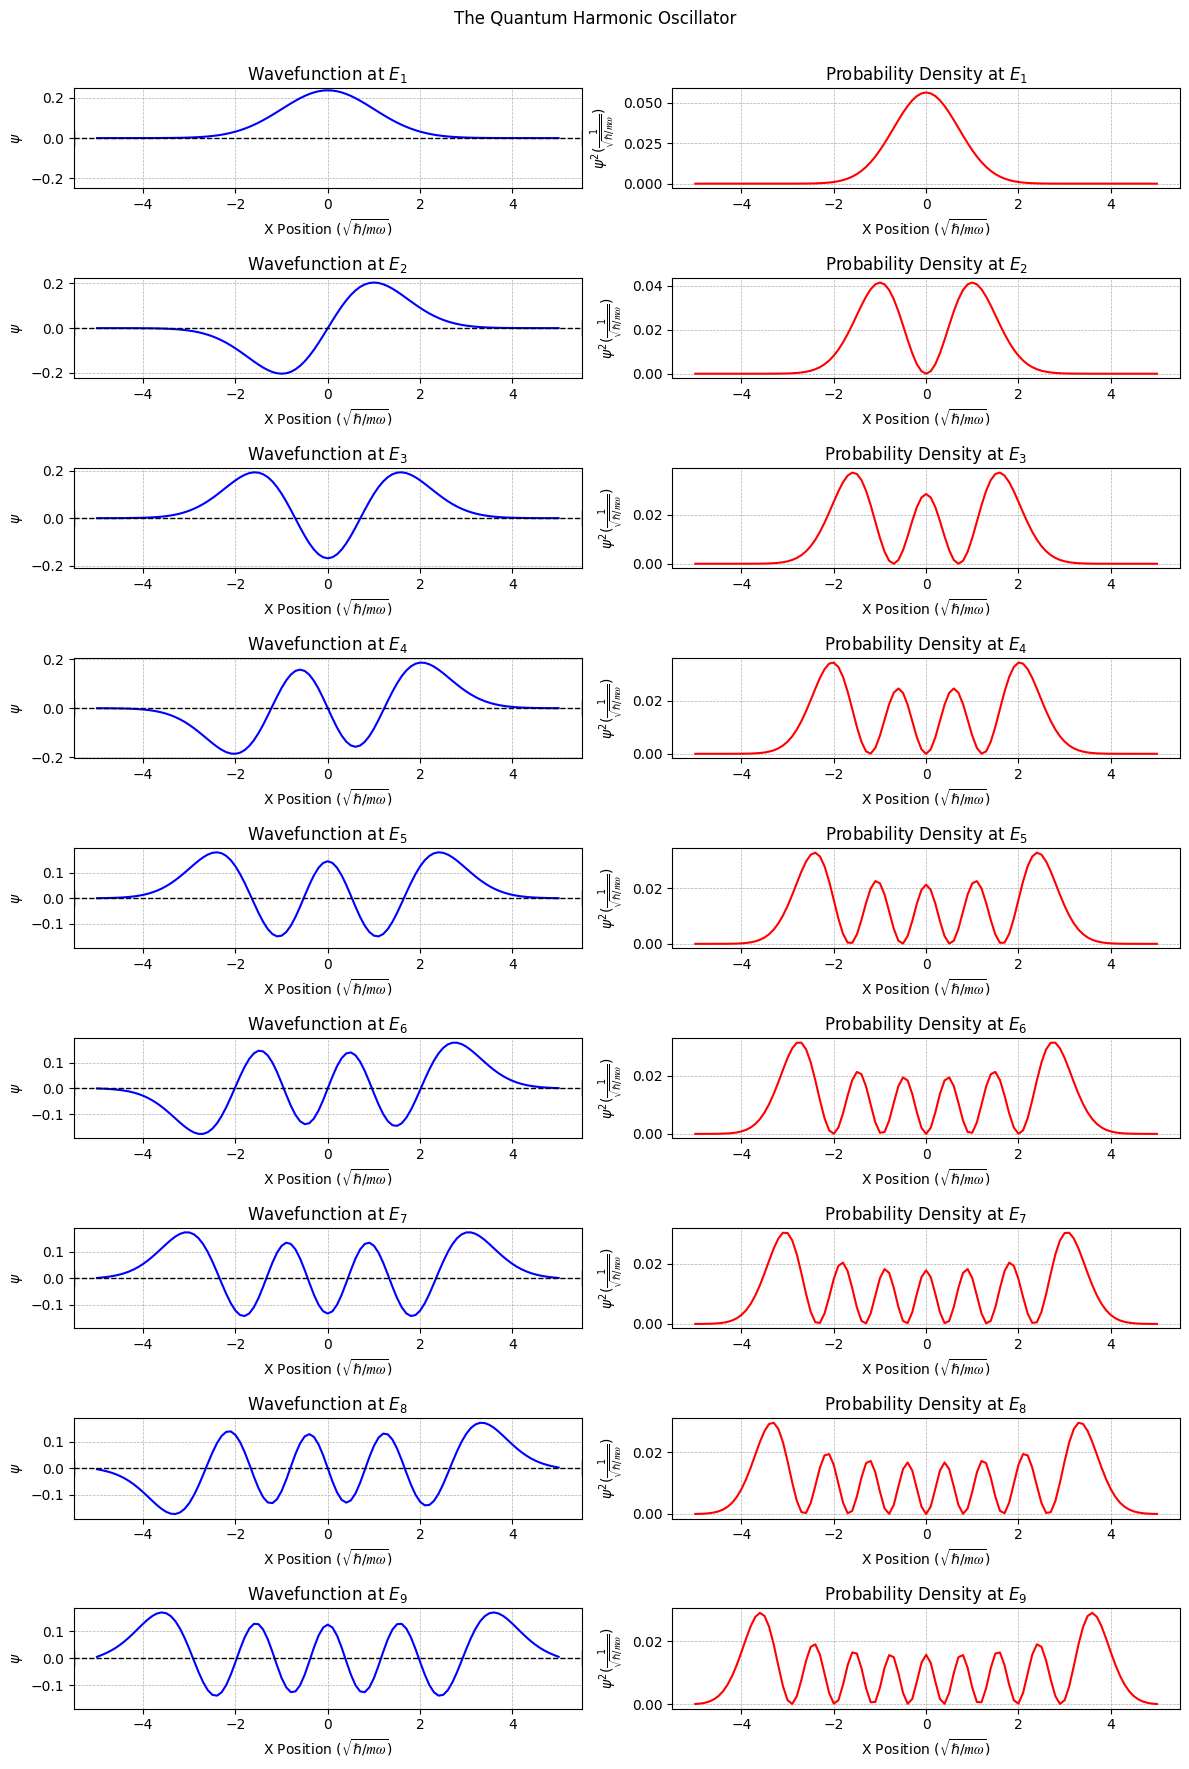

In [877]:
### - Seperate Eigenstate (Wavefunction) and Probability Density (Wavefunction**2) Plots for Quantum Harmonic Oscillator

#User Settings
maxE_vec = 9    # Max number of eigenvectors to plot

#Plot - Setup
title = "Wavefunction at "   #is appended with the eigenstate number in the plot
title_2 = "Probability Density at "
xlabel = "X Position $(\sqrt{ℏ/𝑚𝜔})$"
ylabel = "$\psi$" 
ylabel_2 = "$\psi^2 (\\frac{1}{\sqrt{ℏ/𝑚𝜔}})$" 

#Plotting
rows=maxE_vec
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, rows*2), tight_layout=True)
plt.suptitle("The Quantum Harmonic Oscillator\n \n ")

for i_ax, ax in enumerate(axes.flat):
    n = i_ax//2
    if ((i_ax) % 2) == 0:          #WAVEFUNCTION PSI
        SimplePlotAssist(x, E_vectors_tridiag[:,n], xlabel=xlabel, ylabel=ylabel, ax_mode=1, title=title + "$E_%s$" %(n+1), symetrical=1)
        ax.axhline(y=0 , color='black', marker='|', linestyle='dashed', linewidth=1, markersize=12)
        ax.grid(linestyle = '--', linewidth = 0.5)

    else:                          #PROBABILITY PSI**2
        SimplePlotAssist(x, E_vectors_tridiag[:,n]**2, xlabel=xlabel, ylabel=ylabel_2, colour='r', ax_mode=1, title=title_2 + "$E_%s$" %(n+1))    
        ax.grid(linestyle = '--', linewidth = 0.5)

plt.show()

discuss meaning

## Putting it all together

Here we will make a single set of plots which will combine all the infromation we have gathered so far. We again show the wavefunctions on the left and the probability density functions on the right hand plot, however this time we overlay the potential, and we plot the wavefunctions and probability densities at thier corresponding energy eigenvalues, demonstrating the relationship between the potential, the energy levels and the wavefunctions. This gives a good visual representation of the quantum harmonic oscillator, and of many of the most important concepts in quantum mechanics, i.e, the quantization of energy levels, wave-particle duality, quantum tunneling, and xxxxxxxxxxxxxxxxxx

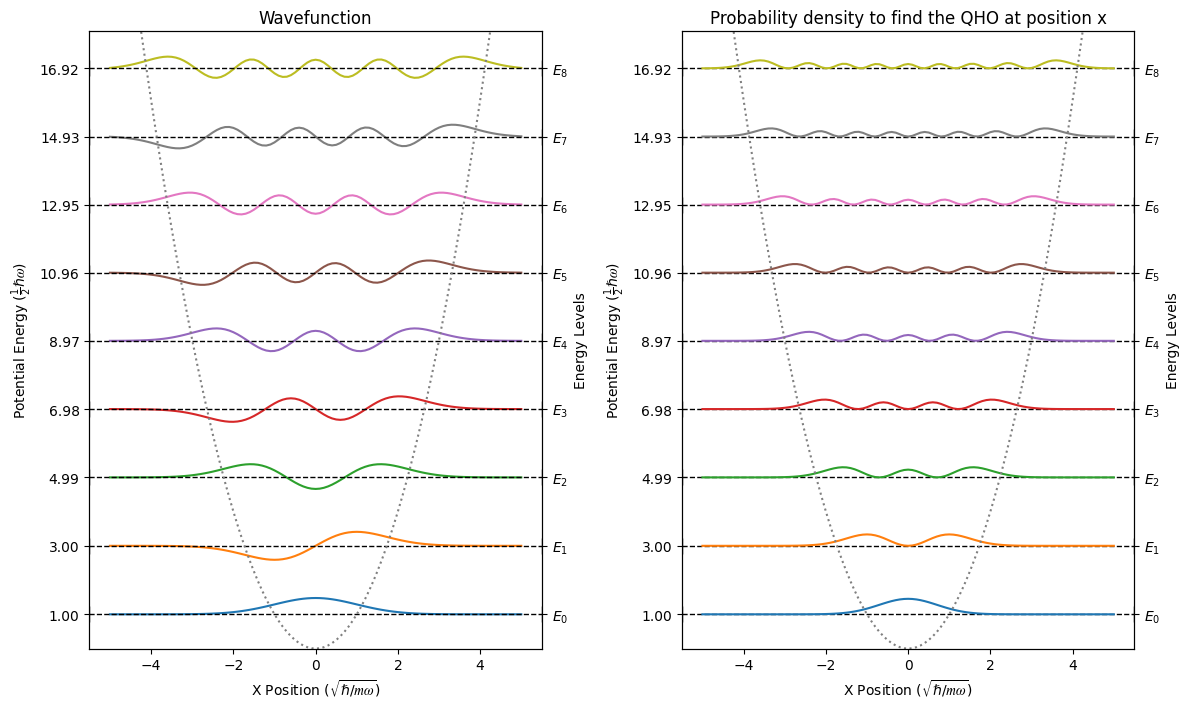

In [878]:
### - Condensed Wavefunction and Probability Density Plots for Quantum Harmonic Oscillator Showing Potential 

#Plot - Setup
title = "Wavefunction"
title_2 = "Probability density to find the QHO at position x"
xlabel = "X Position $(\sqrt{ℏ/𝑚𝜔})$"
ylabel = "Wavefunction $(\psi)$" # (𝜓)")#font error on psi
ylabel_2 = "Probability Density" # (𝜓2)")#font error on psi
boost_wave_amplitude_visibility = 2
boost_prob_amplitude_visibility = 8

#Internal Program Setup 
Eslice = E_vectors_tridiag[:,0:maxE_vec]
EvalSlice = E_vals_tridiag[0:maxE_vec]

#Changes plot height scaling factor when under 4 plots high to keep pleasent viewing size
if maxE_vec <= 4:
    scaled_height = 2 * maxE_vec
else:
    scaled_height = 0.8 * maxE_vec

### - Plotting    
plt.subplots(nrows=1, ncols=2, figsize=(12, scaled_height), tight_layout=True)
y_ticks = []
tick_locations = []
tick_locations_2 = []


plt.subplot(1,2,1)                    #WAVEFUNCTION PSI
for n in range(0, maxE_vec):
    offset = EvalSlice[n]                  #Sets an ofset scaling value so that each successive wavefunction is is offset from the previous on the plot
    y_ticks.append("$E_%s$" %(n))   #Sets the y axis labeles with the corresponding eigenvalue index E_n
    tick_locations.append(offset)     #Sets the y axis tick locations to fall on each ofset waves centre
    ylabel = "Potential Energy $(\\frac{1}{2}ℏ𝜔)$"
    
    SimplePlotAssist(x, Eslice[:,n]*boost_wave_amplitude_visibility+ offset, title=title, xlabel=xlabel, ylabel=ylabel)               #Plots wavefunction against spatial range x
    plt.axhline(y=offset, color='black', marker='|', linestyle='dashed', linewidth=1, markersize=12)   #Adds a central line indicating y = 0 as a guide to the eye 

#plt.yticks(ticks=tick_locations, labels=y_ticks)       #Plots the created y labels
plt.plot(x, V_qho, c='grey', linestyle='dotted')       #Once all wavefunctions are plotted, this line plots the potential we calulated earlier on the same graph to visualise the classical limits
plt.ylim(0,18)                                      #This just trims the potential to the same limits as the wavefunction graph so it is displayed at correct scaling reletive to the probability density plot beside
plt.yticks(ticks=tick_locations)       #Plots the created y labels


# cretaa  a secondary y axis on the right hand side of the plot
ax2 = plt.twinx()
ax2.set_yticks(ticks=tick_locations, labels=y_ticks)       #Plots the created y labels
ax2.set_ylim(0,18)                                      #This just trims the potential to the same limits as the wavefunction graph so it is displayed at correct scaling reletive to the probability density plot beside
ax2.set_ylabel("Energy Levels")

plt.subplot(1,2,2)                     #PROBABILITY PSI**2
for n in range(0, maxE_vec):           #Sets an ofset scaling value so that each successive probability density plot is is offset from the previous on the plot
    offset = EvalSlice[n]                  #Sets an ofset scaling value so that each successive wavefunction is is offset from the previous on the plot
    tick_locations_2.append(offset)    
    ylabel_2 = "Energy Levels"
    plt.axhline(y=offset, label="$E_%s$" %(n), color='black', marker='|', linestyle='dashed', linewidth=1, markersize=12)
    SimplePlotAssist(x, (Eslice[:,n]**2) * boost_prob_amplitude_visibility + offset, title=title_2, xlabel=xlabel, ylabel=ylabel)       #Plots probability density against spatial range x


plt.plot(x, V_qho, c='grey', linestyle='dotted')       #Once all wavefunctions are plotted, this line plots the potential we calulated earlier on the same graph to visualise the classical limits
plt.ylim(0,18)                                      #This just trims the potential to the same limits as the wavefunction graph so it is displayed at correct scaling reletive to the probability density plot beside
plt.yticks(ticks=tick_locations_2) 


# cretaa  a secondary y axis on the right hand side of the plot
ax2 = plt.twinx()
ax2.set_yticks(ticks=tick_locations, labels=y_ticks)       #Plots the created y labels
ax2.set_ylim(0,18)                                      #This just trims the potential to the same limits as the wavefunction graph so it is displayed at correct scaling reletive to the probability density plot beside
ax2.set_ylabel("Energy Levels")



plt.show()




Looking back on our table of analytical values for the energy levels, and filling in our simulated values we can see we get a good match at low n but the error increases as n increases

| n   | Analytical Result         | in terms of $\frac{1}{2}ℏ𝜔$ | Simulation Result | Simulation Error |
|-----|----------------|-------------------|-------------------|------|
| 0   | $\frac{1}{2}ℏ𝜔$  | 1                 | 1.00              |0.00|
| 1   | $1\frac{1}{2}ℏ𝜔$ | 3                 | 3.00              |0.00|
| 2   | $2\frac{1}{2}ℏ𝜔$ | 5                 | 4.99              |0.01|
| 3   | $3\frac{1}{2}ℏ𝜔$ | 7                 | 6.98              |0.02|
| 4   | $4\frac{1}{2}ℏ𝜔$ | 9                 | 8.97              |0.03|
| 5   | $5\frac{1}{2}ℏ𝜔$ | 11                | 10.96             |0.04|
| 6   | $6\frac{1}{2}ℏ𝜔$ | 13                | 12.95             |0.05|
| ... | ...            | ...               | ...               |...|



The dotted u shape line shows the potential that we caluclated, combining the potential and the wavefunctions on this one plot allows us to see the classical limits, where the potential crosses each wavefunction. Classically the wavefucntion is not allowed to have a value other than 0 past these limits (turning points) but we can see here that it does, this is one of the dissagremments between classical and quantum theory.

# Part 4

Having verified our method, we can use it to find the eigenvalues of a more complex system - the Hydrogen atom.  In a spherically symmetric system, the wavefunction can be written :

$$\frac{1}{r}\Psi(r)Y_{lm}(\theta, \phi)e^{i m\phi}$$

where $Y_{lm}(\theta, \phi)$ are the spherical harmonic functions and l, m are the angular momentum quantum numbers. The radial function $\Psi(r)$ satisfies the time-independent Schrödinger equation, provided a suitable term is added to the potential.

##### Rydberg atomic units!!!!!!!!!!!!!


If we use the Bohr radius $a_0$ as the unit $r$, where :
$$a_0 = \frac{4 \pi \epsilon \hbar^2}{m_e e^2}$$

then the energy will be measured in units of :
$$\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$$

and the potential for the hydrogen atom can be written :

$$V(r_i) = \frac{-2}{r_i} + \frac{l(l+1)}{r_i^2}$$

the above atomic unit for energy is the ionisaytion energy of hydrogen and is the energy required to remove an electron from the ground state of a hydrogen atom. 13.606 eV


To find the value of the expression $\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ in electronvolts (eV), we substitute the values of the constants:

- $m_e$: mass of an electron $\approx 9.109 \times 10^{-31}$ kg
- $e$: elementary charge $\approx 1.602 \times 10^{-19}$ C
- $\epsilon_0$: vacuum permittivity $\approx 8.854 \times 10^{-12}$ F/m
- $\hbar$: reduced Planck constant $\approx 1.055 \times 10^{-34}$ J·s

Substituting these values into the expression:



$$
= \frac{(9.109 \times 10^{-31}) \times (1.602 \times 10^{-19})^4}{2 \times (4 \pi \times 8.854 \times 10^{-12})^2 \times (1.055 \times 10^{-34})^2}
$$

$$
\approx 13.606 \, \text{eV}
$$

So, $\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ is approximately $13.606$ eV.


In [879]:
def convert_potential_to_eV(V):
    """
    Input: V: Potential Energy in atomic units
    Returns: eV: Potential Energy in eV
    """
    eV = V * 13.606   
    return eV


Next we construct a function which takes as argument a discrete set of points, $r_i$, and returns the potential $V_i$. You should use a range of $r$ such that the wavefunction become negligible - 200 Bohr radii should be sufficient.  Note that $r$ must now be positive.

In [880]:
### - r Data Generator

#User Inputs 
min_r = 0         #Maximum radial value in units of 𝑎0 (where a0 is the bohr radius)
max_r = 200       #Minimum radial value in units of 𝑎0 
N = 20000          #Number of points to divide radius into 

r, delta_r, N = generate_x(x_min=min_r, x_max=max_r, N=N)    #X spatial genrator fucntion defined earlier works fine for r too


In [881]:
### - Potential Energy Function for Hydrogen Atom
def potential_hydrogen(r, l=0):
    """
    Input: r: Discrete radius values as N x 1 array,
           l: Angular momentum quantum number [defaults to 0 if not set]
    
    Returns: V_hyd: N x 1 array with the corresponsing potential energy of the Hydrogen electron at each radial value.
    """    

    # check for any wlements of r that are 0 and set them to a very small value to avoid division by zero
    #r[r == 0] = 1e-20


    V_hyd = -2/r + (l*(l+1)/r**2)                                 

    # check for any infinities or NaNs in the potential array and set them to very small value
    #V_hyd[np.isinf(V_hyd)] = 1e-20
    V_hyd[np.isnan(V_hyd)] = 1e-20


    return V_hyd                                         #Returns the potential energy of the hydrogen electron across the radial range r

print(potential_hydrogen(r, l=0))                              #Runs the potential function to check for any infinities or NaNs in the potential array    




[ 1.00000000e-20 -2.00000000e+02 -1.00000000e+02 ... -1.00010001e-02
 -1.00005000e-02 -1.00000000e-02]


C:\Users\Student\AppData\Local\Temp\ipykernel_9504\508390585.py:14: RuntimeWarning: divide by zero encountered in true_divide
  V_hyd = -2/r + (l*(l+1)/r**2)
C:\Users\Student\AppData\Local\Temp\ipykernel_9504\508390585.py:14: RuntimeWarning: invalid value encountered in true_divide
  V_hyd = -2/r + (l*(l+1)/r**2)


##  Analytical soloution: 
Determining the energy levels (n1, n2, n3, etc.) for the hydrogen atom potential involves solving the Schrödinger equation for the hydrogen atom. The Schrödinger equation describes how the wave function of a particle (in this case, the electron in the hydrogen atom) evolves over time.

For the hydrogen atom, the Schrödinger equation can be solved exactly due to its simple structure. The solutions yield a set of discrete energy levels characterized by the principal quantum number, $n$. These energy levels correspond to different electron orbitals.

The energy levels for the hydrogen atom are given by the formula:

$$E_n = − \frac{R_H}{n^2}​$$

Where:

$E_n$ is the energy of the level.
$R_H$​ is the Rydberg constant for hydrogen ($R_H$ = 13.6 electron volts).
$n$ is the principal quantum number.

These energy levels are quantized, meaning they can only take on specific values determined by the integer values of nn (1, 2, 3, ...).

In [882]:
def hydrogen_energy_levels(max_n):
    """Calculate the energy levels for hydrogen atom up to a maximum principal quantum number."""
    # Rydberg constant for hydrogen (in electron volts)
    R_H = 13.6  # eV

    energy_levels = []
    for n in range(1, max_n + 1):
        energy = -R_H / (n ** 2)
        energy_levels.append(energy)

    return energy_levels

# Example usage:
max_n = 10
energies = hydrogen_energy_levels(max_n)
for n, energy in enumerate(energies, start=1):
    print(f"Energy level n={n}: {energy:.2f} eV")


# other method, probably same, rydburg probably is combination of these other constants 
def hydrogen_energy_eV(n):
    # Constants
    m_e = 9.10938356e-31  # Mass of the electron in kg
    e = 1.602176634e-19  # Elementary charge in C
    epsilon_0 = 8.854187817e-12  # Vacuum permittivity in F/m
    h = 6.62607015e-34  # Planck constant in J s
    
    # Energy eigenvalue formula
    E_n_Joules = - (m_e * e**4) / (8 * epsilon_0**2 * h**2) * (1 / n**2)
    
    # Convert to electron volts
    E_n_eV = E_n_Joules / e
    
    return E_n_eV

# Example usage
n = 1
energy_eV = hydrogen_energy_eV(n)
print(f"Energy for n = {n}: {energy_eV} eV")



Energy level n=1: -13.60 eV
Energy level n=2: -3.40 eV
Energy level n=3: -1.51 eV
Energy level n=4: -0.85 eV
Energy level n=5: -0.54 eV
Energy level n=6: -0.38 eV
Energy level n=7: -0.28 eV
Energy level n=8: -0.21 eV
Energy level n=9: -0.17 eV
Energy level n=10: -0.14 eV
Energy for n = 1: -13.60569289863495 eV


Bohr Radius (a₀): It's a physical constant representing the most probable distance between the nucleus and the electron in a hydrogen atom when it's in its ground state. It's approximately equal to 0.529177 angstroms.

Angstrom (Å): It's a unit of length used to measure very small distances, primarily in atomic-scale physics and chemistry. 1 angstrom is equal to 0.1 nanometers or 10−1010−10 meters. It's commonly used to express atomic and molecular distances.

In [883]:


def bohr_radius_to_angstrom(bohr_radius):
    """
    Input: bohr_radius: Value in bohr radius units
    
    Returns: Value in angstrom units
    """
    angstrom = bohr_radius * 0.52917721067
    return angstrom

C:\Users\Student\AppData\Local\Temp\ipykernel_9504\508390585.py:14: RuntimeWarning: divide by zero encountered in true_divide
  V_hyd = -2/r + (l*(l+1)/r**2)
C:\Users\Student\AppData\Local\Temp\ipykernel_9504\508390585.py:14: RuntimeWarning: invalid value encountered in true_divide
  V_hyd = -2/r + (l*(l+1)/r**2)


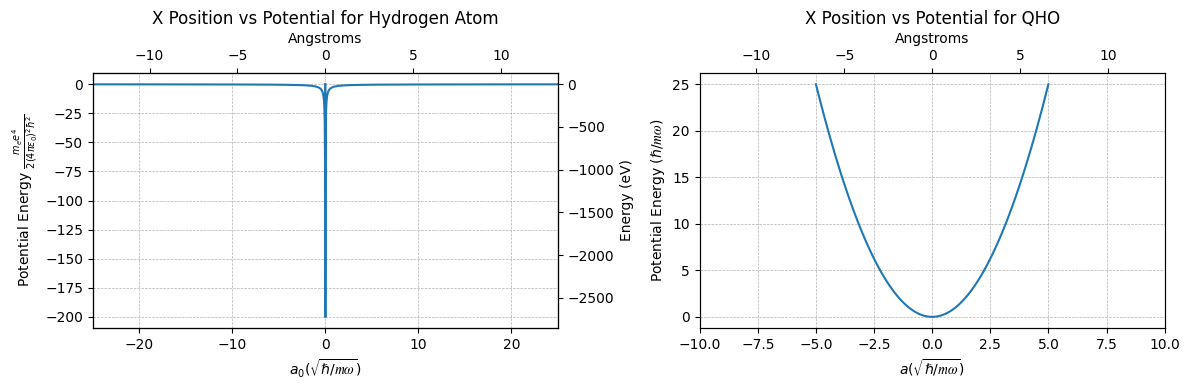

In [884]:
### - Calulate & Plotting Potential for Hydrogen Atom
lower_limit = -25
upper_limit = 25

#Calculate Potential using function
V_hydrogen = potential_hydrogen(r, l=0)     #Runs above function to calcualte the potential of the hydrogen atom 

#Plot Setup
plt.subplots(figsize=(12, 4), tight_layout=True)

#Hydrogen Atom Plot Setup
title = "X Position vs Potential for Hydrogen Atom" 
xlabel = "$a_0 (\sqrt{ℏ/𝑚𝜔})$"                  # Text encapsulated within two $ signs is rendered as latex, needed it to use non standard charecters i.e hbar, psi, etc 
ylabel = "Potential Energy $\\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$" 

#Hydrogen Atom Plotting
plt.subplot(1,2,1)
SimplePlotAssist(r, V_hydrogen, title=title, xlabel=xlabel, ylabel=ylabel)  #Plots the hydrogen atom potential 
plt.plot(-r,V_hydrogen, c="#1f77b4")                                        #Plots mirror image of the one sided hydrogen potential calcuated so it is reflected across x=0 as to compare to the QHO, colour used (c="#1f77b4") is the default matplotlib first plot colour so as to match the first half 
plt.grid(linestyle = '--', linewidth = 0.5)                                 #Adds grid to the plot to make it easier to read off values visualy
plt.xlim(lower_limit, upper_limit)

# get the limits of the y axis on the left hand side plot
ymin, ymax = plt.ylim()

# add a new x axis on the top of the plot
ax2 = plt.twiny()

# set label for the new x-axis
ax2.set_xlabel('Angstroms')

# set new x-axis limits as the min and max angstrom values
ax2.set_xlim(bohr_radius_to_angstrom(lower_limit), bohr_radius_to_angstrom(upper_limit))


ax3 = plt.twinx()
ax3.set_ylabel('Energy (eV)')

ax3.set_ylim(convert_potential_to_eV(ymin), convert_potential_to_eV(ymax))



#QHO Plot Setup
title = "X Position vs Potential for QHO" 
xlabel = "$a (\sqrt{ℏ/𝑚𝜔})$"                   # Text encapsulated within two $ signs is rendered as latex, needed it to use non standard charecters i.e hbar, psi, etc 
ylabel = "Potential Energy $(ℏ/𝑚𝜔)$" 

#QHO Plotting
plt.subplot(1,2,2)
SimplePlotAssist(x, V_qho, title=title, xlabel=xlabel, ylabel=ylabel)       #Plots the QHO potential 
plt.grid(linestyle = '--', linewidth = 0.5)                                 #Adds grid to the plot to make it easier to read off values visualy
plt.xlim(-10,10)

# add a new x axis on the top of the plot
ax2 = plt.twiny()

# set label for the new x-axis
ax2.set_xlabel('Angstroms')

# set new x-axis limits as the min and max angstrom values
ax2.set_xlim(bohr_radius_to_angstrom(lower_limit), bohr_radius_to_angstrom(upper_limit))

plt.show()

We can see how the potential energy gradient is differnt in each case, the QHO on the right is a parabola with the lowest energy at the zero displacement point (x=0), additonally the potential enegy values are positive. In contrast the Hydrogen potential energy (shown on the left), is 0 at r=0 as this is the point where the nucleus exists (in this approximation the nucleus is a point charge) the potential is negative values as the electron is bound to the nucleus. The shape of the hydrogen potential shows us that energy is required to move the electron away from the nucleus

The potential well of the hydrogen atom is created by the positivly charged nucleus which attracts the negatively charged electron. The electron in the hydrogen atom is trapped in the well, in what is known as a bound state. If the electron in the well is provided enough energy it can escape the well, this is known as ionisation, i.e where a atom looses one/some of its electrons. The energy required to remove the electron from the well is the ionisation energy, for hydrogen this is 13.6 eV for reasons we shall see shortly. The energy levels of the hydrogen atom are quantised, meaning they can only take on specific values determined by the integer values of n (1, 2, 3, ...), however there are infinatly many energy levels. The energy levels are negative, this is because the electron is bound to the nucleus and it requires energy to remove it from the well.


Now re-use the `hamiltonian()` function to generate the Hamiltonian matrix for the Hydrogren atom, and find at least the first 5 eigenvalues for at least l=0. Compare these eigenvalues with the expected eigenvalues.

In [885]:
# Hamiltonian function running on hydrogen potential
H_main_hydrogen, H_plusone_hydrogen = hamiltonian_diag(r, V_hydrogen, delta_r)   #The main diagonal of the Hamiltonian matrix and the ofset diagonal 

# Eigenvalue & Eigenvector Solver for hydrogen
E_vals_hydrogen, E_vectors_hydrogen = eigh_tridiagonal(H_main_hydrogen, H_plusone_hydrogen)

print(E_vals_hydrogen[0:10])
print(convert_potential_to_eV(E_vals_hydrogen[0:10]))

[-1.04327036 -0.25531803 -0.1126783  -0.0631594  -0.04033708 -0.02797264
 -0.02053078 -0.01570689 -0.01237454 -0.00958303]
[-14.19473657  -3.47385716  -1.53310102  -0.85934677  -0.54882626
  -0.38059574  -0.27934184  -0.21370796  -0.16836795  -0.13038671]


In [886]:
### - Analytical Hydrogen Electron Eigenvalues
def hydrogen_analytical_e_vals(maxE_val):
    """
    Input: maxE_val: maximum desired eigenvalue
    
    Returns: hydrogen_analytical_E_vals: 1D list of analytical eigenvalues for the hydrogen atom from ground state up till maxE_val
             hydrogen_n_vals: 1D list of index positions for the analytical eigenvalues    
    """
    
    hydrogen_analytical_E_vals=[]                         #Initialises list to hold the analytical hydrogen eignevalues
    hydrogen_n_vals=[]                                    #Initialises list to hold the hydrogen index n 
    
    for n in range (1,maxE_val+1):                          #Iterates through the values of n up to the maximum user desired eignevalue (maxE_val)
        Esub_n = -1/(n**2)                                #Calculates the analytical eigenvalues, which are given by -1/(n**2) due to the choice of units we have used for energy (XXXXXXXXXXXXXXXXXXXXX)
        hydrogen_analytical_E_vals.append(Esub_n)         #Appends calulated analytical eigenvalue to the list) 
        hydrogen_n_vals.append(n)                         #Appends the index to its list 
    return(hydrogen_analytical_E_vals, hydrogen_n_vals)   #Returns the list of eigenvalues and the list of index values
print(hydrogen_analytical_e_vals(10)[0])
print(convert_potential_to_eV(np.array(hydrogen_analytical_e_vals(10)[0])))

[-1.0, -0.25, -0.1111111111111111, -0.0625, -0.04, -0.027777777777777776, -0.02040816326530612, -0.015625, -0.012345679012345678, -0.01]
[-13.606       -3.4015      -1.51177778  -0.850375    -0.54424
  -0.37794444  -0.27767347  -0.21259375  -0.16797531  -0.13606   ]



| n   | Analytical Result | in terms of $\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ | Simulation Result | Simulation Error |
|-----|------------------|-------------------------------|-------------------|------|
| 0   | $-1.000 \frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$  | -1.0000                      | -1.0433           |-0.0433|
| 1   | $-0.250 \frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ | -0.2500                      | -0.2553           |-0.0053|
| 2   | $-0.111 \frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ | -0.1111                      | -0.1127           |-0.0017|
| 3   | $-0.063 \frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ | -0.0625                      | -0.0632           |-0.0007|
| 4   | $-0.040 \frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ | -0.0400                      | -0.0403           |-0.0003|
| 5   | $-0.027 \frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ | -0.0278                      | -0.0280           |-0.0002|
| 6   | $-0.020 \frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$ | -0.0204                      | -0.0205           |-0.0001|
| ... | ...            | ...               | ...               |...|


C:\Users\Student\AppData\Local\Temp\ipykernel_9504\508390585.py:14: RuntimeWarning: divide by zero encountered in true_divide
  V_hyd = -2/r + (l*(l+1)/r**2)
C:\Users\Student\AppData\Local\Temp\ipykernel_9504\508390585.py:14: RuntimeWarning: invalid value encountered in true_divide
  V_hyd = -2/r + (l*(l+1)/r**2)


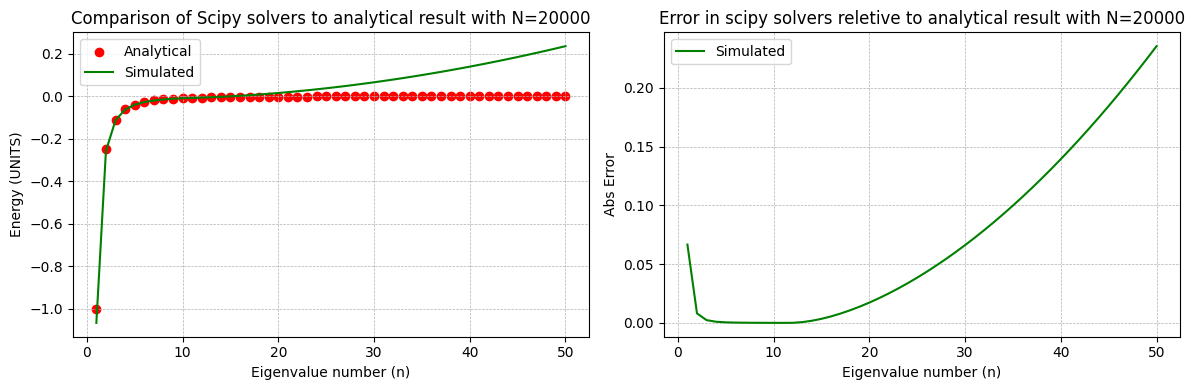

In [887]:
compare_solvers_to_analytical(N=20000, maxE_val=50, potential_function=potential_hydrogen, analytical_function=hydrogen_analytical_e_vals, sorting_fix=1);

Finally, as for the quantum harmonic oscillator, plot the wavefunctions.

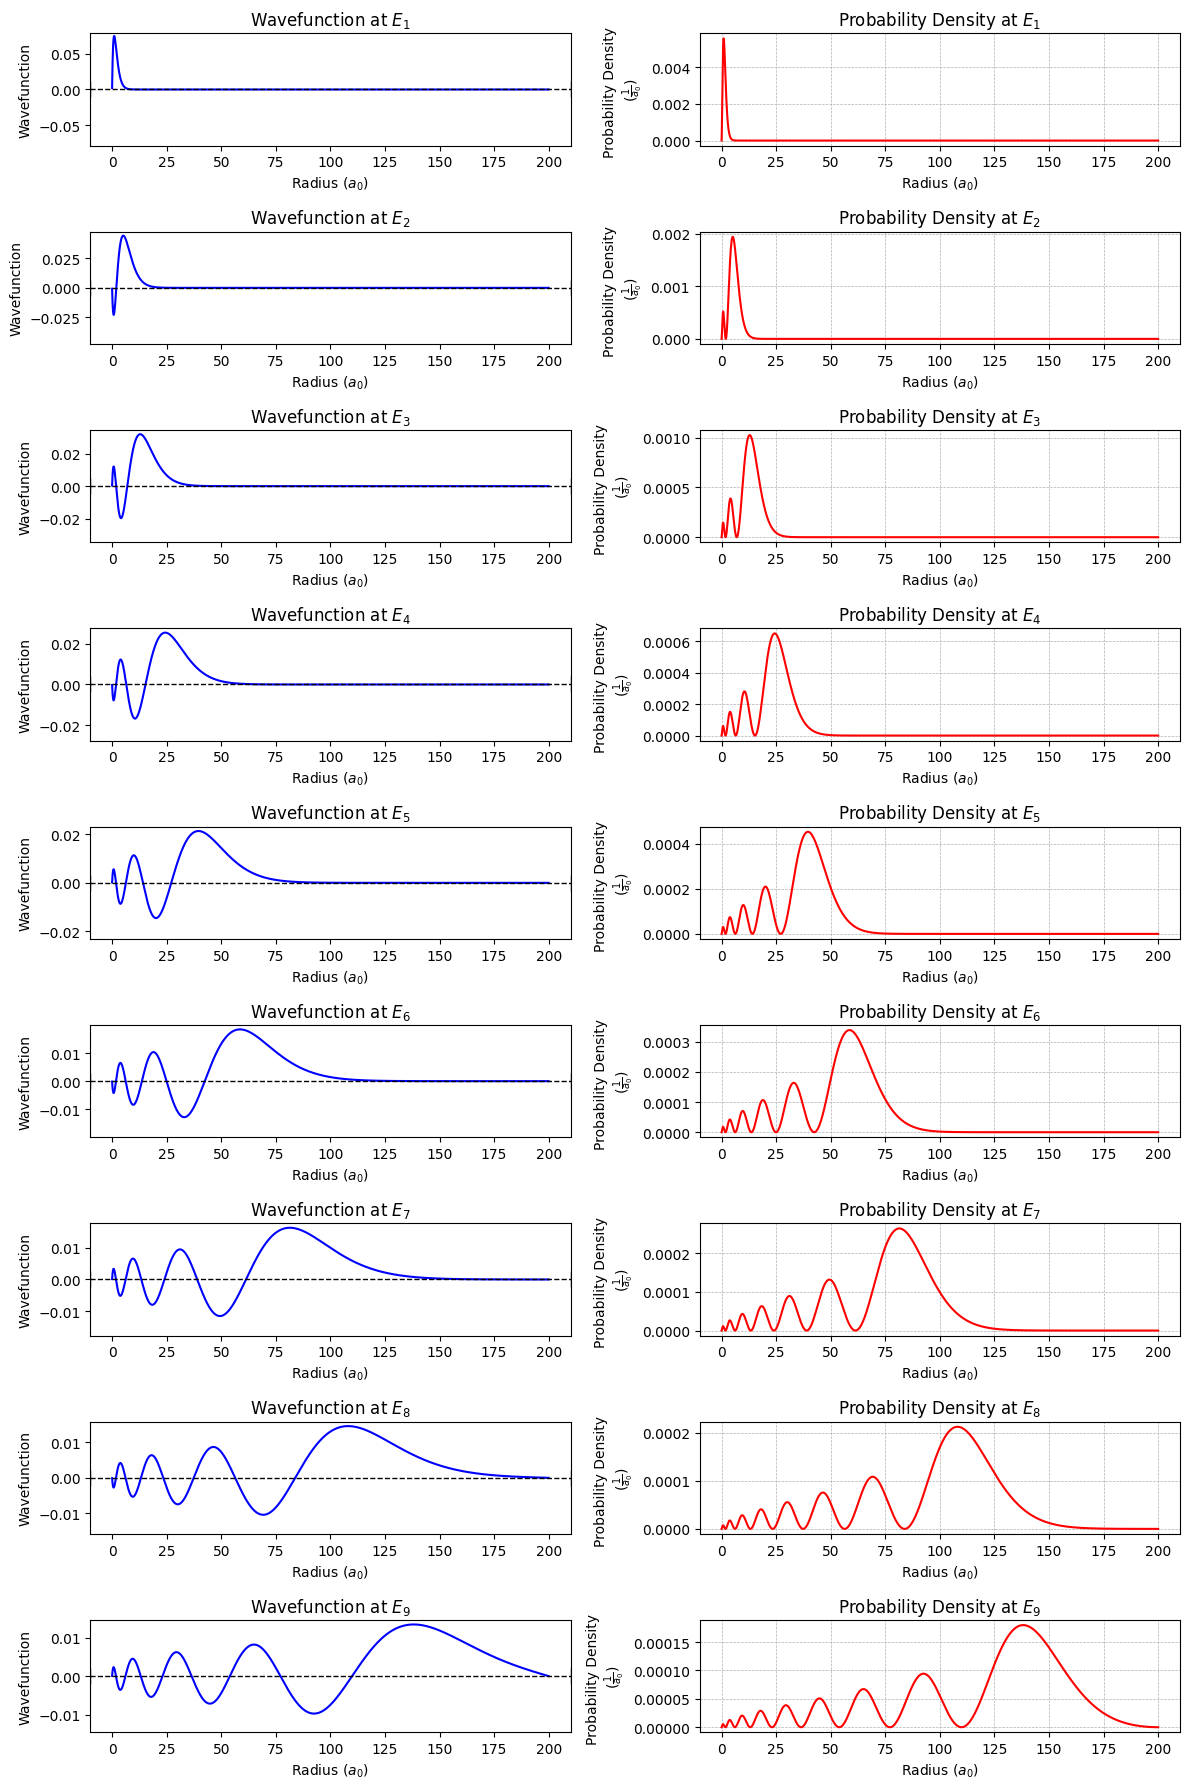

In [888]:
### - Seperate Eigenstate (Wavefunction) and Probability Density (Wavefunction**2) Plots for Hydrogen Atom

#Plot - Setup
title = "Wavefunction at "           #Is appended with the eigenstate number in the plot
title2 = "Probability Density at "   #Is appended with the eigenstate number in the plot
xlabel = "Radius ($a_0$)"
ylabel = "Wavefunction"             
ylabel_2 = "Probability Density \n($\\frac{1}{a_0}$)" 

#Plotting
n=1                                  #Initialises loop counter as i from enumerate is not in sync
rows = maxE_vec                      #Defines the number of rows for the plot based on the number of plots selected
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, rows *2), tight_layout=True)
for i, ax in enumerate(axes.flat): 
    if ((i) % 2) == 0:            #WAVEFUNCTION PSI
        SimplePlotAssist(r, E_vectors_hydrogen[:,n-1], xlabel=xlabel, ylabel=ylabel, ax_mode=1, title=title + "$E_%s$" %(n), symetrical=1)
        ax.axhline(y=0 , color='black', marker='|', linestyle='dashed', linewidth=1, markersize=12)
    
    else:                         #PROBABILITY PSI**2
        SimplePlotAssist(r, E_vectors_hydrogen[:,n-1]**2, xlabel=xlabel, ylabel=ylabel_2, colour='r', ax_mode=1, title=title2 + "$E_%s$" %(n))    
        ax.grid(linestyle = '--', linewidth = 0.5)
        n = n+1
        
plt.show()  


description of above
 

[-14.19473657  -3.47385716  -1.53310102  -0.85934677  -0.54882626]


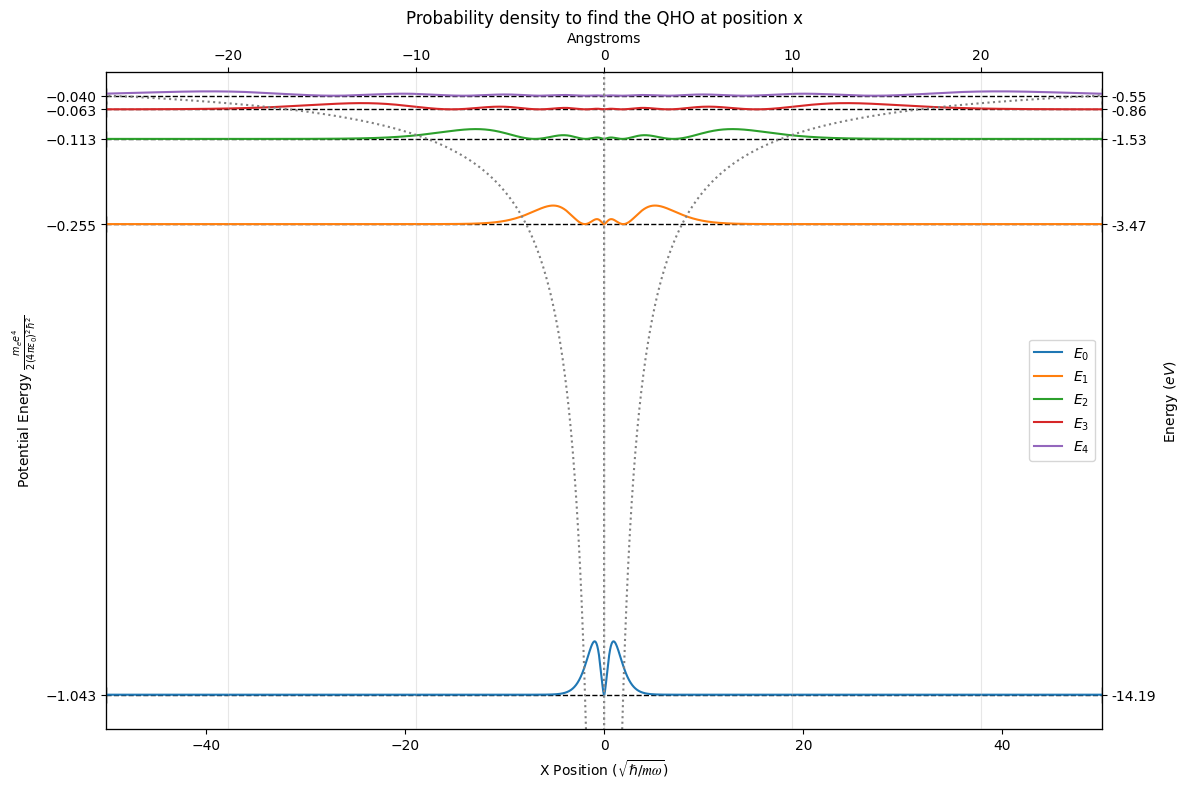

In [889]:
### - Condensed Wavefunction and Probability Density Plots for Quantum Harmonic Oscillator Showing Potential 

#Plot - Setup
title = "Wavefunction"
xlabel = "X Position $(\sqrt{ℏ/𝑚𝜔})$"
ylabel = "Potential Energy $\\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$" 
boost_prob_amplitude_visibility = 16

maxE_vec = 5

x_limits = -50, 50
y_limits = -1.10, 0


#Internal Program Setup 
Eslice = E_vectors_hydrogen[:,0:maxE_vec]
EvalSlice = E_vals_hydrogen[0:maxE_vec]

print(convert_potential_to_eV(EvalSlice))

#Changes plot height scaling factor when under 4 plots high to keep pleasent viewing size


### - Plotting    
y_ticks = []
tick_locations = []
tick_locations_2 = []



plt.subplots(nrows=1, ncols=1, figsize=(12, 8), tight_layout=True)
for n in range(0, maxE_vec):           #Sets an ofset scaling value so that each successive probability density plot is is offset from the previous on the plot
    offset = EvalSlice[n]                  #Sets an ofset scaling value so that each successive wavefunction is is offset from the previous on the plot
    tick_locations_2.append(offset)    

    y_ticks.append(round((convert_potential_to_eV(offset)), 2))   #Sets the y axis labeles with the corresponding eigenvalue index E_n
    plt.axhline(y=offset, color='black', marker='|', linestyle='dashed', linewidth=1, markersize=12,)
    SimplePlotAssist(r, (Eslice[:,n]**2) * boost_prob_amplitude_visibility + offset, title=title_2, xlabel=xlabel, ylabel=ylabel)       #Plots probability density against spatial range x
    
    # get the last used mpl colour 
    colour = plt.gca().lines[-1].get_color()
    plt.plot(np.negative(r), (E_vectors_hydrogen[:,n]**2  * boost_prob_amplitude_visibility + offset), c=colour,  label="$E_%s$" %(n))                           #Again have mirrored the hydrogen data so that it covers both sides of the nucleus for visual comparison to the 2d rings image, colour used for the mirror inversion is hex code #1f77b4 which is the default matplot lib first line colour, to make it match the line above



# show a legend with the energy levels
plt.legend()

plt.plot(r, V_hydrogen, c='grey', linestyle='dotted')       #Once all wavefunctions are plotted, this line plots the potential we calulated earlier on the same graph to visualise the classical limits
plt.plot(np.negative(r), V_hydrogen, c='grey', linestyle='dotted')       #Once all wavefunctions are plotted, this line plots the potential we calulated earlier on the same graph to visualise the classical limits

plt.ylim(y_limits)                                      #This just trims the potential to the same limits as the wavefunction graph so it is displayed at correct scaling reletive to the probability density plot beside
plt.yticks(ticks=tick_locations_2) 
plt.xlim(x_limits)



# cretaa  a secondary y axis on the right hand side of the plot
ax2 = plt.twinx()
ax2.set_ylim(y_limits)                                      #This just trims the potential to the same limits as the wavefunction graph so it is displayed at correct scaling reletive to the probability density plot beside
ax2.set_yticks(ticks=tick_locations_2, labels=y_ticks)       #Plots the created y labels
ax2.set_ylabel("Energy $(eV)$")


# add a new x axis on the top of the plot
ax2 = plt.twiny()

# set label for the new x-axis
ax2.set_xlabel('Angstroms')

# set new x-axis limits as the min and max angstrom values
ax2.set_xlim(bohr_radius_to_angstrom(x_limits[0]), bohr_radius_to_angstrom(x_limits[1]))


# add grid that has its own y ticks

plt.grid(alpha=0.3)


plt.show()




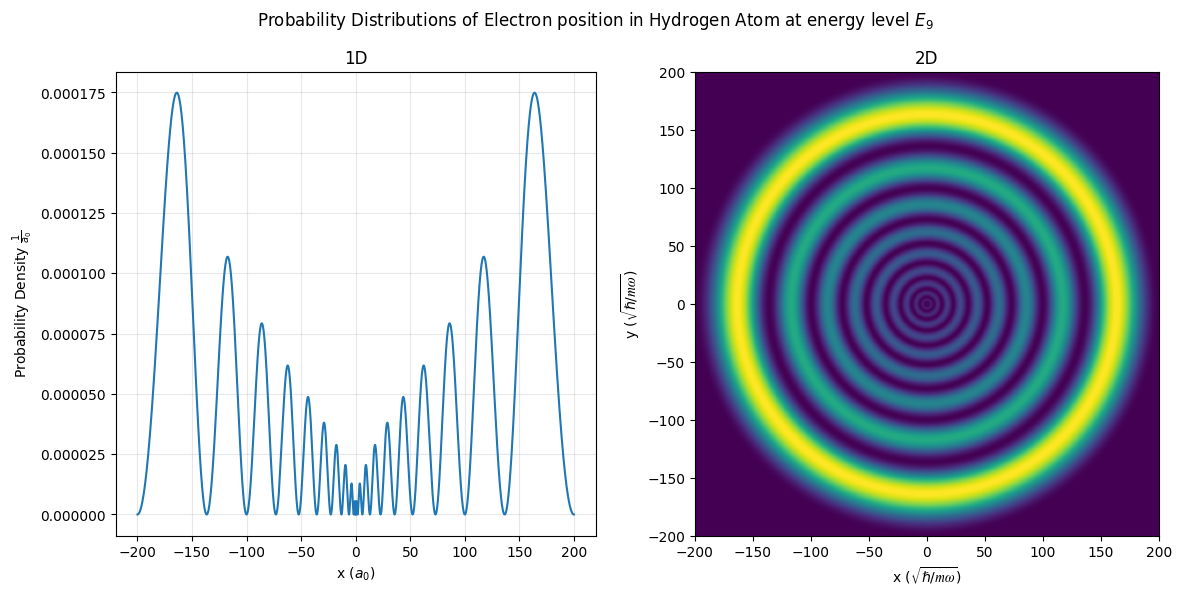

In [890]:
### - 2D Visualisations of Primary Quantum Number n

#User Settings
eigenval_selection = 9 # Eigenvalue number of the largest desired eigenvalue  // AKA 'n' the  primary quantum number
n=eigenval_selection # primary quantum number

#Interpolation of 1D results
interpolation_of_1d_result = interpolate.interp1d(r, E_vectors_hydrogen[:,eigenval_selection]**2, fill_value="extrapolate")  #Interolates the resulting radial function so i can use it to plot 2D and 3D representations without recalculating

#Creates meshgrids then calculates the radius of each point in the matrix/lattice
delta_r = 1                                                                                                 #Sets delta r as the pixel spacing 
X2d,Y2d = np.meshgrid(np.arange(-max_r, max_r+delta_r, delta_r), np.arange(-max_r, max_r+delta_r, delta_r)) #Creates a meshgrid of x, y points
radius_grid = np.sqrt(X2d**2+Y2d**2)                                                                        #Fills the X Y grid with the grid points radial seperation from 0,0

#Creates blank output image canvas
image = np.zeros((max_r*2+delta_r, max_r*2+delta_r))                 #Creates a zero filled array of the correct size for output image

#Processing 2D graphics output line by line similar to scan line tv
for row, _ in enumerate(X2d):                                        #Scans through row by row
    image[row] = interpolation_of_1d_result(radius_grid[row])        #Genrates the row for the image from the radial values in the grid and the interpolated function
    
# Plot set up
plt.subplots(nrows=2, ncols=1, figsize=(12, 6), tight_layout=True)
plt.suptitle("Probability Distributions of Electron position in Hydrogen Atom at energy level $E_%s$" %eigenval_selection )

# 1D Plot of original 1D data
plt.subplot(1,2,1)
title = "1D"
xlabel = "x $(a_0)$" 
ylabel = "Probability Density $\\frac{1}{a_0}$" 
SimplePlotAssist(r, E_vectors_hydrogen[:,eigenval_selection]**2, title=title, xlabel=xlabel, ylabel=ylabel)  #Plots the selected eigenvectors corresponding probability distribution
plt.plot(np.negative(r), E_vectors_hydrogen[:,eigenval_selection]**2, c="#1f77b4")                           #Again have mirrored the hydrogen data so that it covers both sides of the nucleus for visual comparison to the 2d rings image, colour used for the mirror inversion is hex code #1f77b4 which is the default matplot lib first line colour, to make it match the line above
plt.grid(alpha=0.3)

# 2D Plot of interpolated data
plt.subplot(1,2,2)
plt.imshow(image, extent=[X2d.min(),X2d.max(),Y2d.min(),Y2d.max()])
plt.title("2D")  
plt.xlabel("x $(\sqrt{ℏ/𝑚𝜔})$") 
plt.ylabel("y $(\sqrt{ℏ/𝑚𝜔})$") 
plt.show()



In [891]:
def find_local_maxima(array):
    indicies = []
    values = []
    for i in range(1, len(array) - 1):
        if array[i] > array[i - 1] and array[i] > array[i + 1]:
            indicies.append(i)
            values.append(array[i])

    return indicies, values


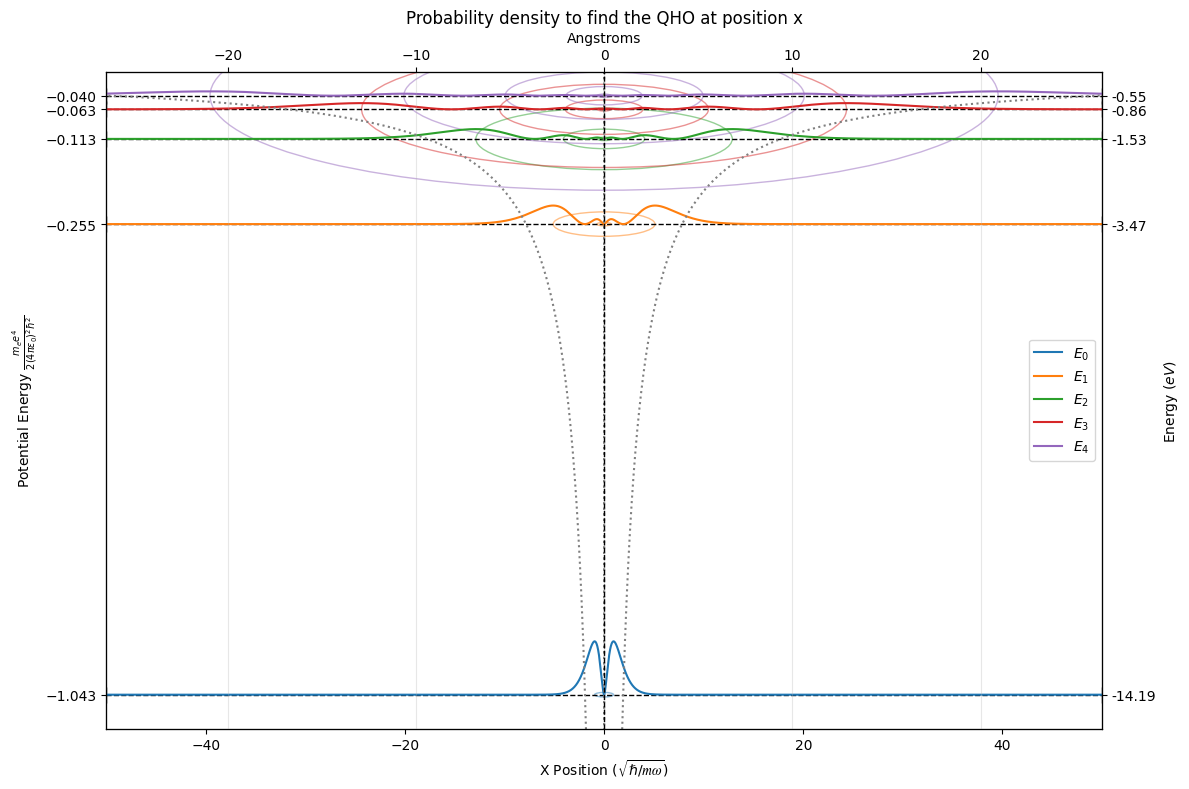

In [892]:
### - Condensed Wavefunction and Probability Density Plots for Quantum Harmonic Oscillator Showing Potential 
import matplotlib.patches as patches
from scipy.signal import argrelextrema


#Plot - Setup
title = "Wavefunction"
xlabel = "X Position $(\sqrt{ℏ/𝑚𝜔})$"
ylabel = "Potential Energy $\\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$" 
boost_prob_amplitude_visibility = 16

maxE_vec = 5

x_limits = -50, 50
y_limits = -1.10, 0


#Internal Program Setup 
Eslice = E_vectors_hydrogen[:,0:maxE_vec]
EvalSlice = E_vals_hydrogen[0:maxE_vec]



### - Plotting    
y_ticks = []
tick_locations_2 = []



plt.subplots(nrows=1, ncols=1, figsize=(12, 8), tight_layout=True)
for n in range(0, maxE_vec):           #Sets an ofset scaling value so that each successive probability density plot is is offset from the previous on the plot
    offset = EvalSlice[n]                  #Sets an ofset scaling value so that each successive wavefunction is is offset from the previous on the plot
    tick_locations_2.append(offset)    

    y_ticks.append(round((convert_potential_to_eV(offset)), 2))   #Sets the y axis labeles with the corresponding eigenvalue index E_n
    plt.axhline(y=offset, color='black', marker='|', linestyle='dashed', linewidth=1, markersize=12,)
    SimplePlotAssist(r, (Eslice[:,n]**2) * boost_prob_amplitude_visibility + offset, title=title_2, xlabel=xlabel, ylabel=ylabel)       #Plots probability density against spatial range x
    
    # get the last used mpl colour 
    colour = plt.gca().lines[-1].get_color()
    plt.plot(np.negative(r), (Eslice[:,n]**2  * boost_prob_amplitude_visibility + offset), c=colour,  label="$E_%s$" %(n))                           #Again have mirrored the hydrogen data so that it covers both sides of the nucleus for visual comparison to the 2d rings image, colour used for the mirror inversion is hex code #1f77b4 which is the default matplot lib first line colour, to make it match the line above

    # determine all the local maxima in the probability density as a array of indices
    local_maxima_indices, local_maxima_values = find_local_maxima(Eslice[:,n]**2)

    # Adding central band of each orbital
    for i in local_maxima_indices:  
        width = r[i]*2
        height = width / 250
        ellipse = patches.Ellipse((0, offset), width, height, edgecolor=colour, facecolor='none', alpha=0.5)
        plt.gca().add_artist(ellipse)  # Use plt.gca() to get current axes    


# show a legend with the energy levels
plt.legend()

plt.plot(r, V_hydrogen, c='grey', linestyle='dotted')       #Once all wavefunctions are plotted, this line plots the potential we calulated earlier on the same graph to visualise the classical limits
plt.plot(np.negative(r), V_hydrogen, c='grey', linestyle='dotted')       #Once all wavefunctions are plotted, this line plots the potential we calulated earlier on the same graph to visualise the classical limits

plt.ylim(y_limits)                                      #This just trims the potential to the same limits as the wavefunction graph so it is displayed at correct scaling reletive to the probability density plot beside
plt.yticks(ticks=tick_locations_2) 
plt.xlim(x_limits)



# cretaa  a secondary y axis on the right hand side of the plot
ax2 = plt.twinx()
ax2.set_ylim(y_limits)                                      #This just trims the potential to the same limits as the wavefunction graph so it is displayed at correct scaling reletive to the probability density plot beside
ax2.set_yticks(ticks=tick_locations_2, labels=y_ticks)       #Plots the created y labels
ax2.set_ylabel("Energy $(eV)$")


# add a new x axis on the top of the plot
ax2 = plt.twiny()

# set label for the new x-axis
ax2.set_xlabel('Angstroms')

# set new x-axis limits as the min and max angstrom values
ax2.set_xlim(bohr_radius_to_angstrom(x_limits[0]), bohr_radius_to_angstrom(x_limits[1]))


# add grid that has its own y ticks

plt.grid(alpha=0.3)

plt.axvline(x=0, color='black', linestyle='dashed', linewidth=1, markersize=12,)

plt.show()




In [893]:
### - Calculating radial maxima to plot 3D shells
eigenval_selection=9
density = E_vectors_hydrogen[:,eigenval_selection]**2
density_maxima_indexs = argrelmax(density)             #Finds the local energy maxima on the plot to the left above 
radial_maxima_values = r[density_maxima_indexs]        #Finds the corresponding r values for the maxima


In [894]:
### - 3D Visualisation function for primary quantum number 'n'
def spherical_shells(radius, lines=20):
    """
    Input: radius: Radius spherical shells,
           lines: number of lines to draw the sphere frame from for the contour plot
    
    Returns: sphere_x: array of cartesisan x coordiantes for the sphere,
             sphere_y: array of cartesisan y coordiantes for the sphere,
             sphere_z: array of cartesisan z coordiantes for the sphere
    """
    circles = max(lines/2, 4)                                     #Sets number of horizontal circles to draw for the surface frame
    u, v = np.mgrid[1:1.8*np.pi:lines*1j, 0:np.pi:circles*1j]     #Creates a meshgrid of radial coordinate points, that fall on the sperical bound, only went from 1 to 1.8*pi so that the shpere will have a slice in it to see the inner spheres
    sphere_x = radius * np.cos(u) * np.sin(v)                     #Calculates cartesian x components           
    sphere_y = radius * np.sin(u) * np.sin(v)                     #Calculates cartesian x components 
    sphere_z = radius * np.cos(v)                                 #Calculates cartesian x components 
    return sphere_x, sphere_y, sphere_z                           #Returns x, y, z components 
 

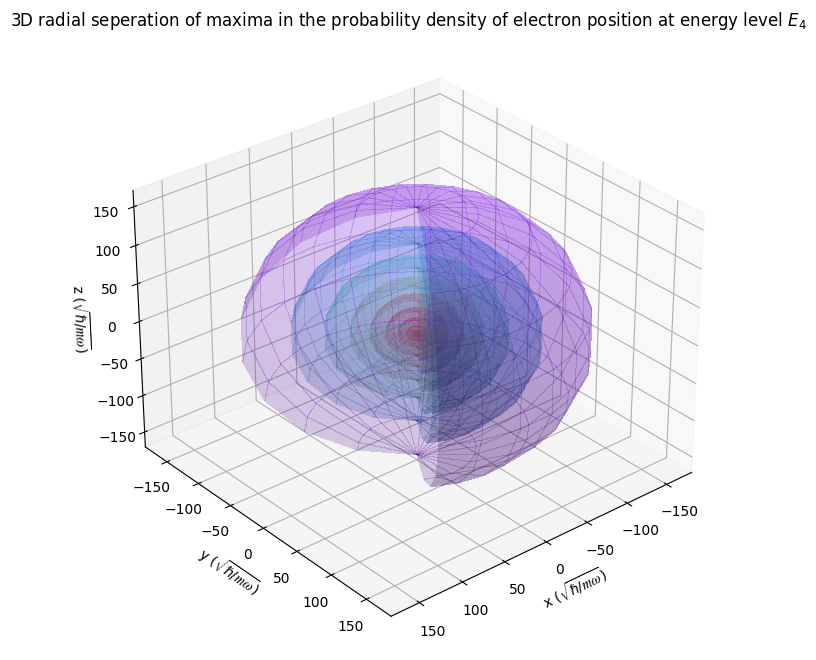

In [895]:
### -  Plotting 3D Visualisations for primary quantum number 'n'

#Plot Setup
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
color = iter(cm.rainbow(np.linspace(0, 2, len(radial_maxima_values))))    #Sets a colour gradient for each successive sphere

#Plotting each shell
for shell_radius in reversed(radial_maxima_values):                       #Iterates through each shell Reversed the list of radial maxima so it plots from biggest to smallest ratehr than other way round, as the order of plotting sets the fore/back ground stacking
    c = next(color)                                                       #Iterates through the colour gradient selection
    wfx,wfy,wfz = spherical_shells(radius=shell_radius, lines=20)         #Caluclates the shells cartesian coordinates using the function created above
    ax.plot_surface(wfx,wfy, wfz, color=c, alpha=0.2, antialiased=False)  #Plots the shell, setting antialiased=False and alpha to low makes the shperes more transparent, neccessary to see the inner spheres

ax.set_xlim(-175,175)                                                     #After taking a slice out of the sphere the axis became lop sided so reset the limits on the shrunken axis to regain a 1:1:1 aspect ratio
ax.set_xlabel("x $(\sqrt{ℏ/𝑚𝜔})$") 
ax.set_ylabel("y $(\sqrt{ℏ/𝑚𝜔})$")
ax.set_zlabel("z $(\sqrt{ℏ/𝑚𝜔})$")
ax.set_title("3D radial seperation of maxima in the probability density of electron position at energy level $E_%s$" %n)   
ax.view_init(elev=30, azim=50)                                            #Set the plot viewing angle 

plt.show() 

The above plots show the effect on the radial probability maxima from changing the primary quantum number 'n'

In [896]:
### - 3D Visualisations of angular momentum quantum number 'l'
def plot_3D_angular_wavefunction_probdensity(l, m=0):

    #Calcualte spherical harmonics
    r = 400                     
    phi = np.linspace(0, np.pi, 100)
    theta = np.linspace(0, 2*np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)  #creates a meshgrid of radial coordiantes falling on the sphere defined by phi and theta
    Ylm = sph_harm(m,l,theta, phi).real   #this is psi angular aka the angular eignefunction probability densiities?

    #Convert spherical coordinates to Cartesian
    x_coord = r * np.sin(phi) * np.cos(theta) * abs(Ylm)
    y_coord = r * np.sin(phi) * np.sin(theta) * abs(Ylm)
    z_coord = r * np.cos(phi) * abs(Ylm)

    #Create a colour map
    term_1 = (Ylm - Ylm.min())                    #Moves lower limit to 0
    term_2 = (Ylm.max() - Ylm.min())              #Normalises upper limit to 1
    if term_2 == 0:                               #Checks for 0 values in divide, which occur when l = 0
        fcolors = Ylm + 0.5                       #Sets a constant colour for this case of l = 0 as there is only one spherical orbital and it needs no colour differentiation to make it out visually
    else:
        fcolors = term_1/term_2                   #Otherwise sets the normalised colour gradient
    
    #Plotting
    ax.plot_surface(x_coord, y_coord, z_coord, facecolors=cm.cool(fcolors), alpha=0.4)   #Plots the surface using the normalised colour gradient, setting alpha to 0.4 makes the plots geometry look better
    ax.set_xlim(-max_r, max_r)
    ax.set_ylim(-max_r, max_r)
    ax.set_zlim(-max_r, max_r)  
    return (x_coord, y_coord, z_coord)                                                   #Returns cartsian x, y, z coordinates

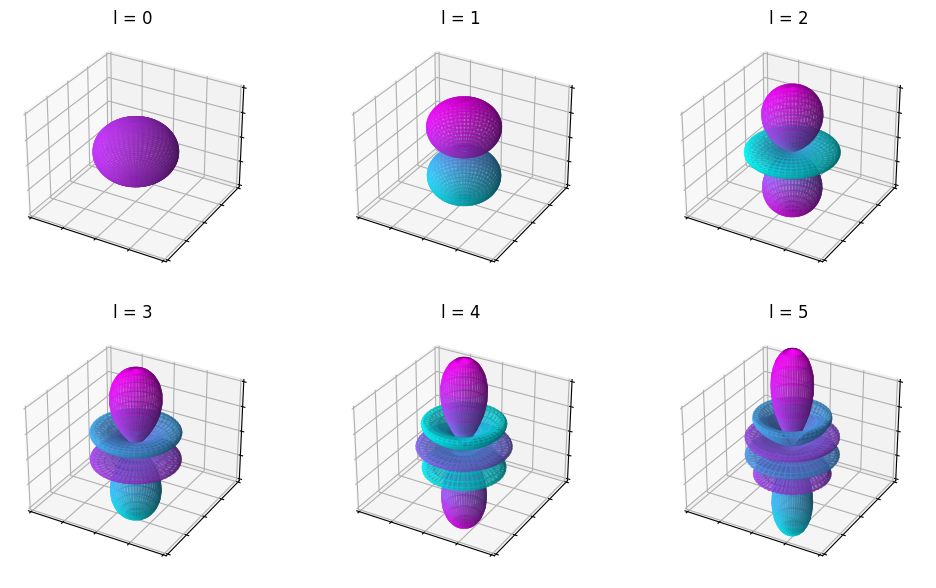

In [897]:
#Make 3D plots of angular wavefunction probability densities for hydrogen atom varying l 
fig = plt.figure(figsize=(12,7))
for l in range (0,6):                                        #Iterates through l values
    ax = fig.add_subplot(2, 3, l+1, projection='3d')         
    plot_3D_angular_wavefunction_probdensity(l, m=0)         #Plots the angular wavefunction 
    ax.set_title("l = %s" %l)
    ax.set_xticklabels([])                                   #Removes the plot value labels without removing the grid
    ax.set_yticklabels([])                                   #As above
    ax.set_zticklabels([])                                   #As above
plt.show()

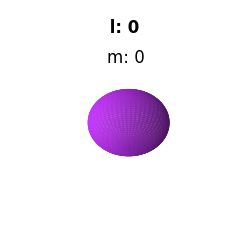

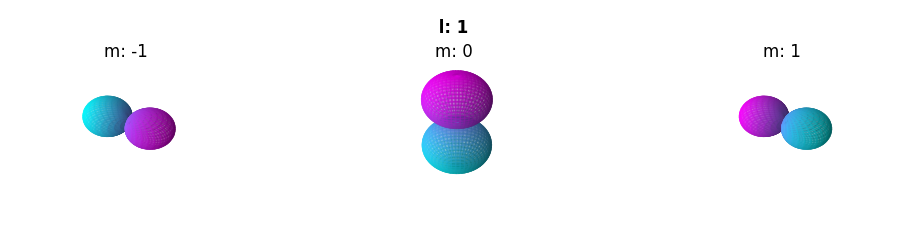

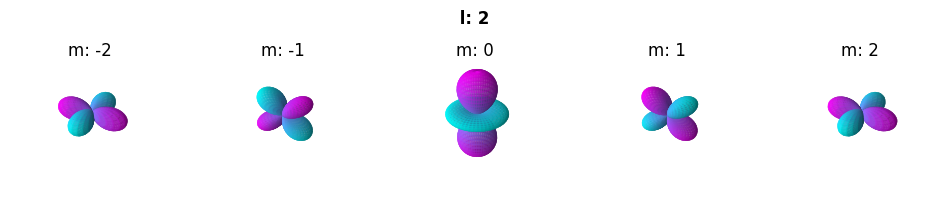

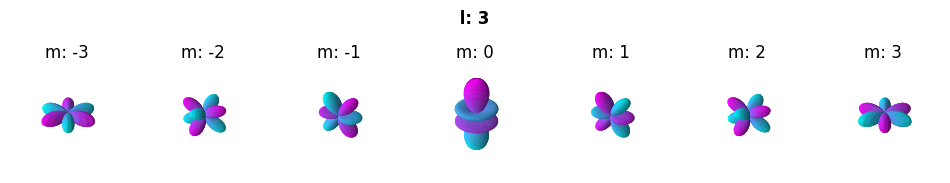

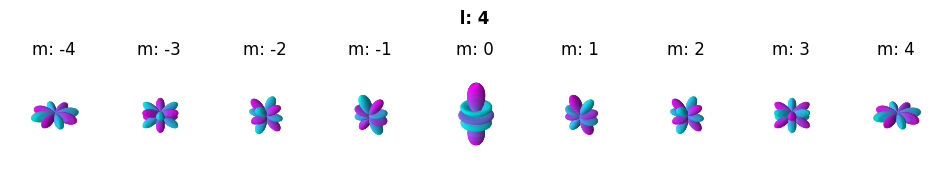

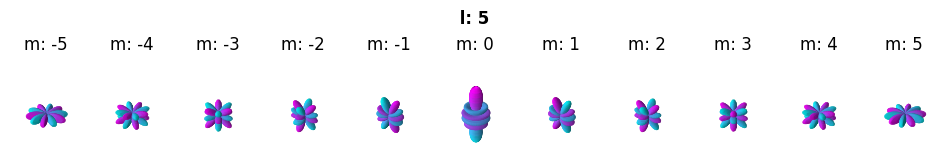

In [898]:
#Make 3D plots of angular wavefunction probability densities for hydrogen atom varying l and m

#User Settings
max_n = 6 #Setting for the maximum value of n to go up to // beware, values over 6 end up with very cramped plots 

for l in range (0, max_n):                      #Iterates through l values, l goes from 0 to n-1
    fig = plt.figure(figsize=(12, 3))
    
    for m in range (-l,l+1):                    #Iterates through m values, m goes from -l to l
        ax = fig.add_subplot(1, (l*2)+1, m+l+1, projection='3d')    #Sets the plot position from the values of l and m for that strip
        plt.suptitle("     l: %s" %l, fontweight='bold', y=0.85)    #Sets title for each genration of l
        plot_3D_angular_wavefunction_probdensity(l, m=m)            
        ax.set_title("m: %s" %m, y=0.8 + (l**2/40))                 #(l**2/40) is just a scaling factor that slightly moves the subtitles as they get closer to the plots each time due to the plot getting wider automatically as l increases
        ax.axis('off')                                              #Hides the plot axis for a better visual experience
    plt.show()

Report:

To find the values of the allowed energy eigenvalues of a quantum system we have to apply the hamiltonian opperator to the wavefunction $(\psi)$. To simplify the problem we have taken it in one dimension and in time independsnt form where the wavefuntion is just a function of $x$ $\psi(x)$


$$H \psi(x) = E \psi(x)$$


The Hamiltonian $H$ is given by 


$$H = \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V $$


it contains two terms, the potential energy term V and the kinetic energy term D where 


$$D = \frac{-\hbar^2}{2m}\frac{d^2}{dx^2}$$


the potential term can be implemented easily as a simple function, however D requires the use of numerical methods as it contains a continuous derivative.


Given this, the hamiltonian is implemented as a matrix equation, with $\psi$ an $N$-dimensional vector, and $H$ an $(N \times N)$ matrix.


The matrix is symmetric, we can find the eigenvalues and eigenfunctions of the matrix using readily availibly pyton routines from the scipy libraries. I chose to test two solvers, scipy.linalg.eig and scipy.linalg.eigh_tridiagonal to compare their results. At first the eig fucntion was returning some strange results but then i realised the returned values were not sorted, so after adding a quicksort function via np.sort() it returned the exact same results as the eigh_tridiagonal function.

As both function methods returned the exact same results it would be down to compute resources rather than accuracy to pick one, i did not implement a time loop to test the difference as my code is alredy substantial. Without having tested it i would pick using the eigh_tridiagonal function as it requires a much simpler hamiltonian function, less memory usage from not having to store the majority 0 valued matricies, and requires no np.sort to return the results.

Testing both methods on the QHO problem and then comparing the Eigenvalues to the analytical results showed that the solvers can provide acuurate results for the QHO up to around an E_n value of 10. I then did the same for comparing eigenvectors to the analytical results but only the first 4 terms. The results of the solvers come out exactly mathcing the analytical eigenvectors albeit with a scale mismatch that i assume is down to a unit conversion scaling.

Then made some interesting plots of the wavefunctions and probability distributions for a range of the QHO's energy eigenstates, including one which overlayed the potental with the wavefunctions to demonstrate the mismatch in classical and quantum theory in the ability of the wavefucntion to have a value outside of the classicly deifned turning points.

Moved on to the hydrogen atom where ran through the same as for the QHO. Compared the potential of the QHO to the Hydrogen atom which showed interesting differences in the two systems. Also compared the analytical hydrogen eigenvalues with the solvers which provide accurate results up till around E_n 20 this time.

The previous visuals were all based on the radial wavefunction which each have a unique energy value, but the total wavefucntion for the hydrogen atom consists of the radial wavefunction and the angular wavefunction which gives each energy level above n=1 more than one possible state, they are degenerate. Created visulisations for the hydrogen atoms l and m quantum numbers in 2 and 3D to show how the various numbers effect the probability distribution of the electron, showing the degenerate states that give rise to the s, p... orbital shells.
